### Import Necessary Libraries

In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize
import scipy.integrate as integrate

### Data

Loading Data of 09-02-2025-NOON for ['BTCUSDT', 'ETHUSDT']...


100%|██████████| 2/2 [00:00<00:00, 10.96it/s]


Checking for gaps in the depth data captured with time difference > 400ms...
Series([], Name: timestamp, dtype: timedelta64[ns])
Series([], Name: timestamp, dtype: timedelta64[ns])
Preprocessing Data...


100%|██████████| 2676299/2676299 [00:38<00:00, 69761.45it/s]


Computing Reference Prices...
Reconstructing LOB from trades data...


100%|██████████| 2023657/2023657 [00:06<00:00, 336005.84it/s]


Reconstructing Cancel Orders from trades...


100%|██████████| 2023657/2023657 [00:16<00:00, 119063.24it/s]


Visualizing Reference Price Movement...


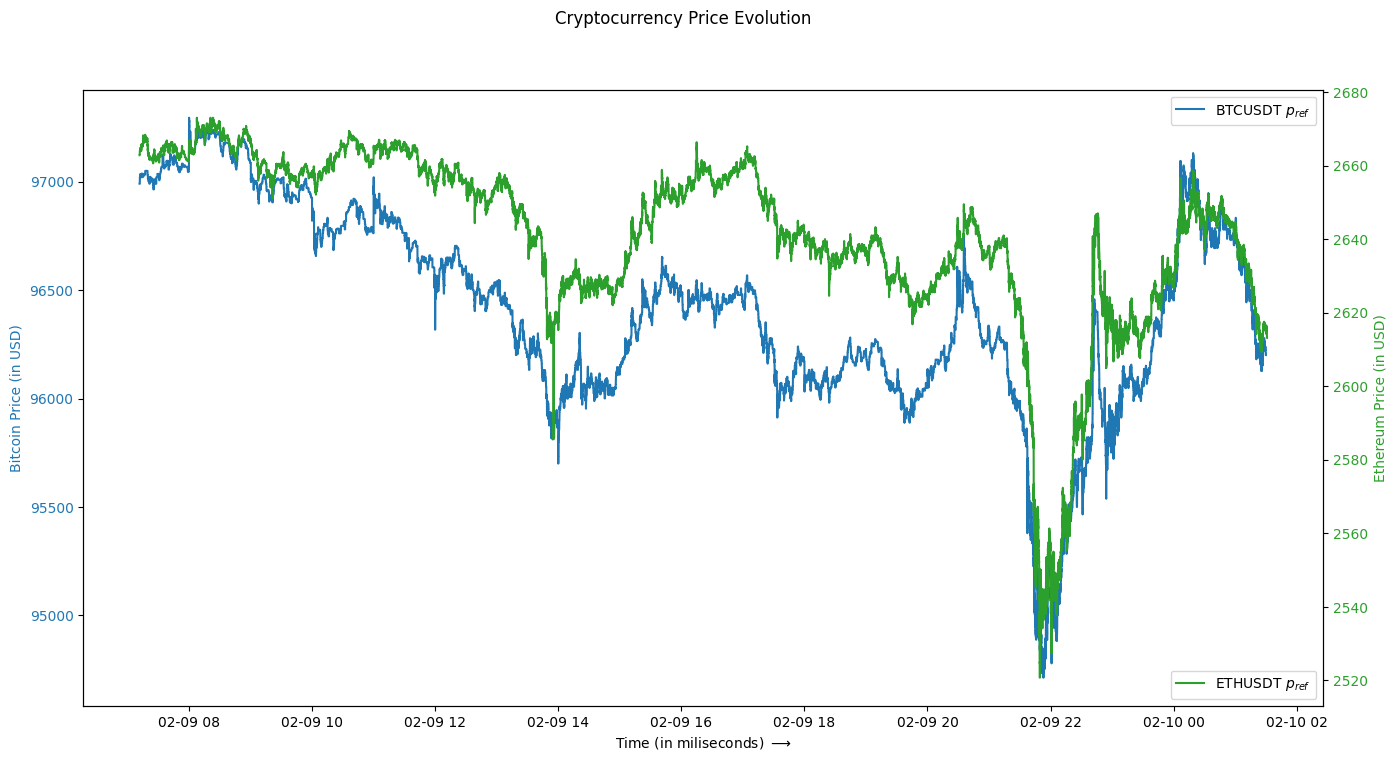

Visualizing Reconstructed Price Path between LOB Snapshots...


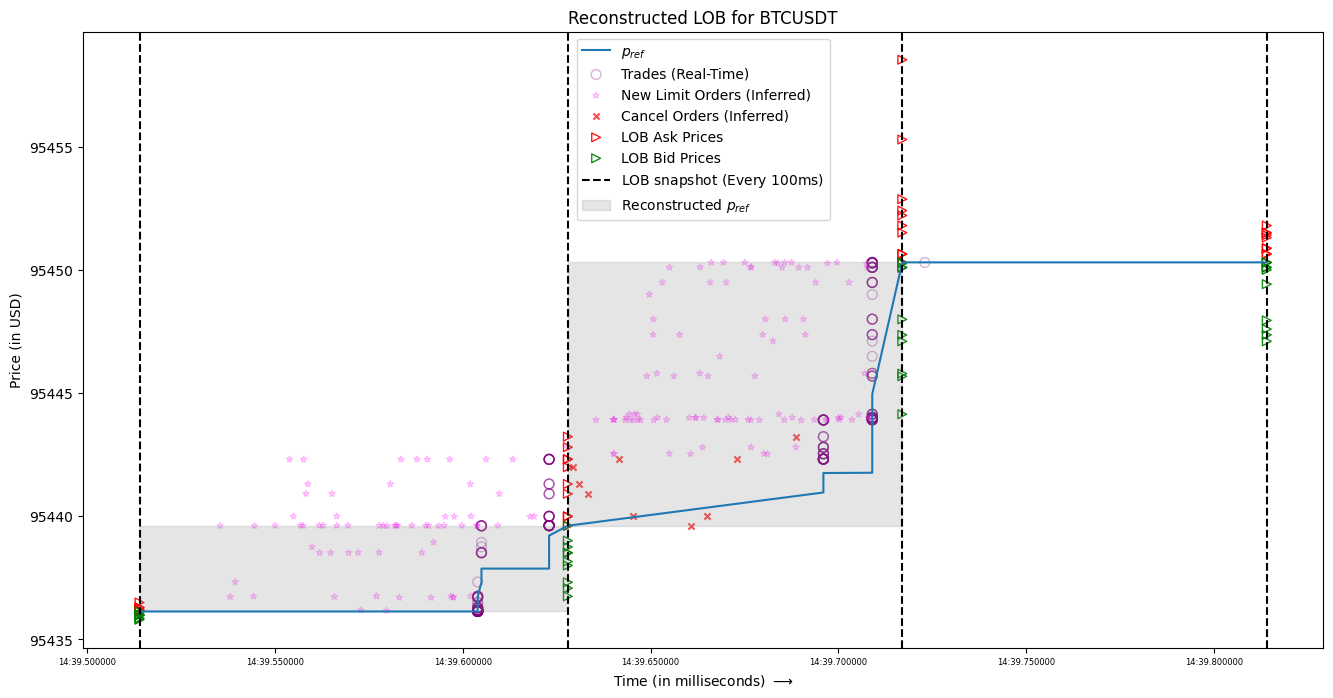

Converting Depth and Trades data to Queue Numbers...


100%|██████████| 2/2 [00:00<00:00, 13.83it/s]


Performing Validation Checks for Trade Queue Numbers...
Checking BTCUSDT...
Case 1: p > 0, mm_buy == 1
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 2: p < 0, mm_buy == 0
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 3: p == 0, mm_buy == 1
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 4: p == 0, mm_buy == 0
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Checking ETHUSDT...
Case 1: p > 0, mm_buy == 1
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 2: p < 0, mm_buy == 0
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 3: p == 0, mm_buy == 1
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 4: p == 0, mm_buy == 0
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Computing ATS...
Visualizing the Queue Numbers present in the LOB snapshots....


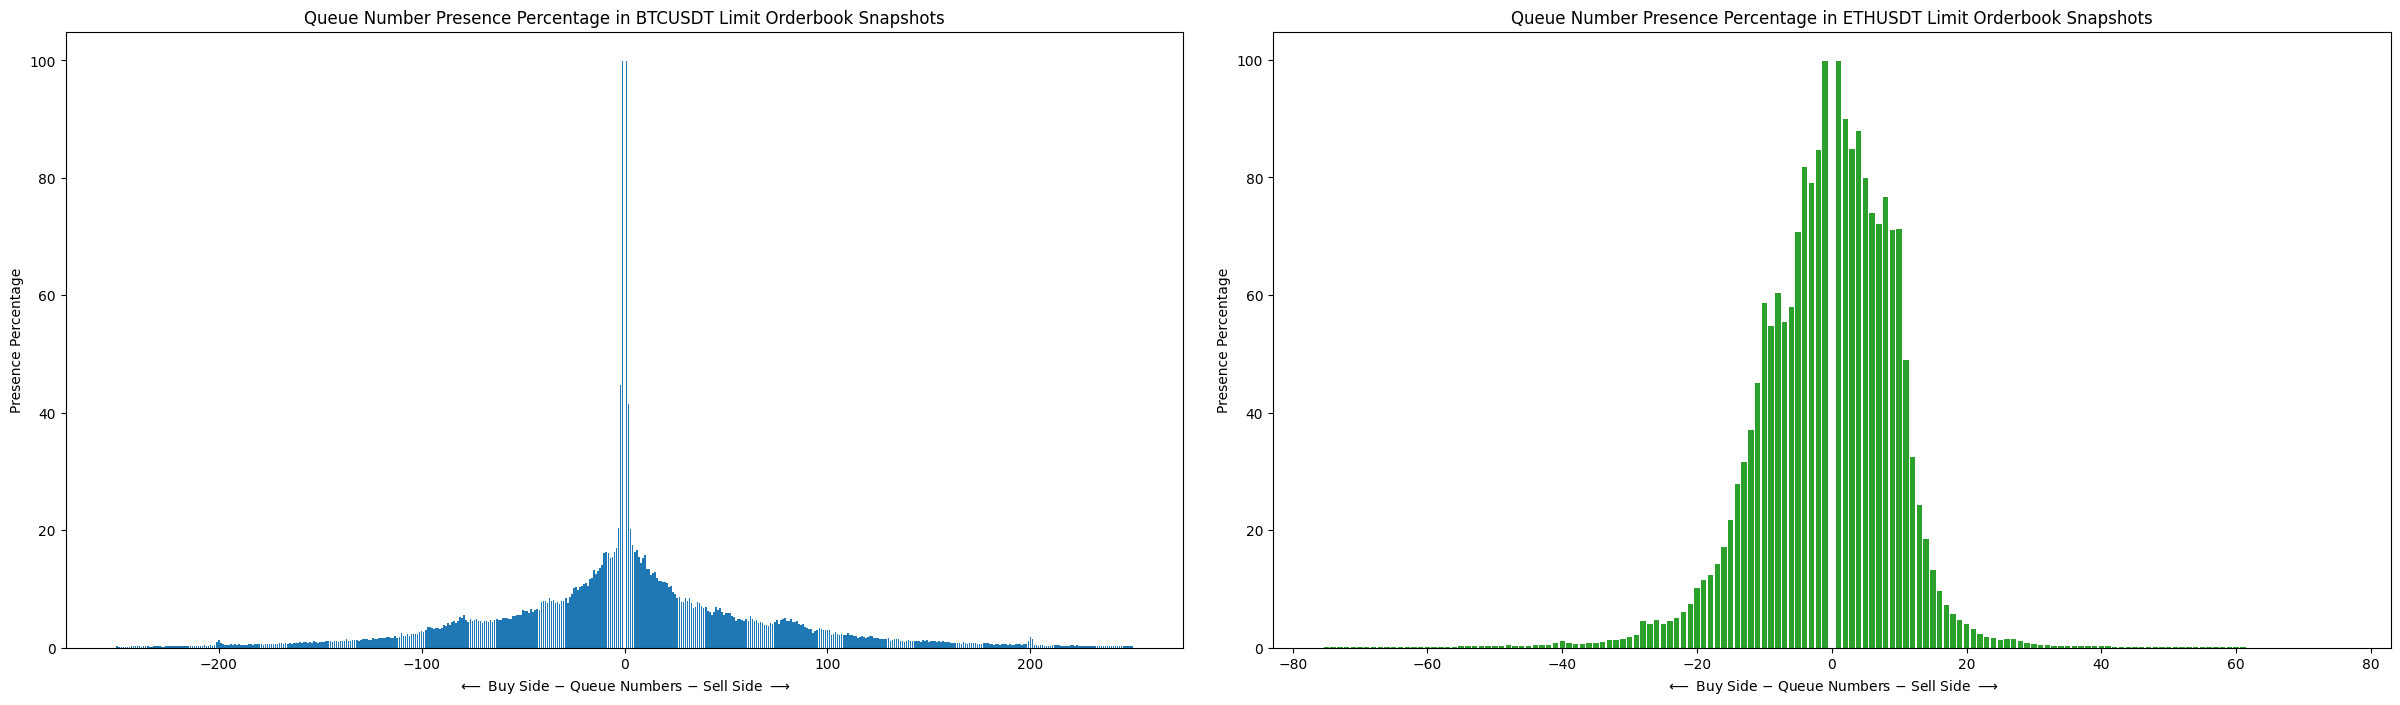

Visualizing the ATS...


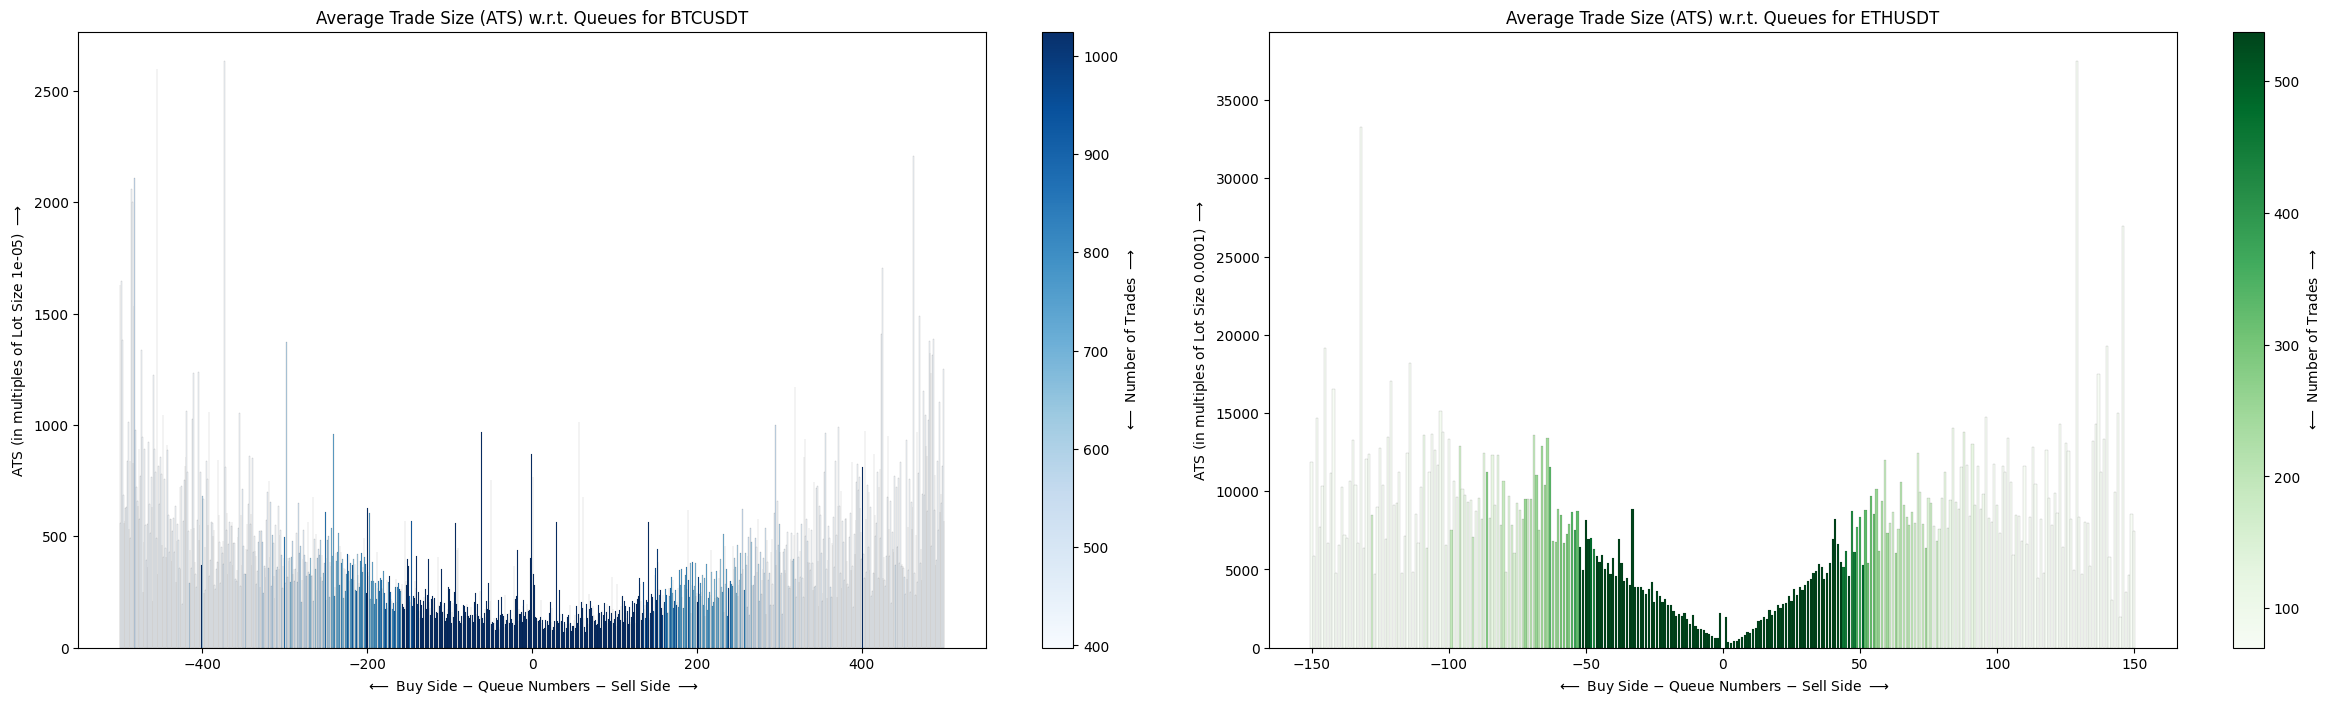

Computing Max Symmetric Queue Number with ATS avaialability...
Max Queue Number (Symmetric) with ATS available for BTCUSDT: 1624
Max Queue Number (Symmetric) with ATS available for ETHUSDT: 183
Removing unavailable ATS queue numbers from depth data...


100%|██████████| 2/2 [00:04<00:00,  2.49s/it]


Removing unavailable ATS queue numbers from trade data...


100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


Converting volumes in depth data to queue size...


100%|██████████| 2/2 [06:00<00:00, 180.14s/it]


Converting volumes in trades data to queue size...


100%|██████████| 2/2 [00:07<00:00,  3.59s/it]

BTCUSDT Depth Data:


,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:01.814,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:01.914,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.014,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.114,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.214,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:29:51.014,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1
2025-02-10 01:29:51.114,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1
2025-02-10 01:29:51.214,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1


BTCUSDT Trades Data:


,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:02.067,1,1,0
2025-02-09 07:12:02.069,1,3,0
2025-02-09 07:12:02.071,-1,1,1
2025-02-09 07:12:02.464,1,2,0
2025-02-09 07:12:03.252,1,1,0
...,...,...,...
2025-02-10 01:29:48.730,1,3,0
2025-02-10 01:29:49.639,-1,1,1
2025-02-10 01:29:49.970,1,1,0


BTCUSDT Reference Prices:


,rp,trade
timestamp,,
2025-02-09 07:12:01.814,9698999.5,0
2025-02-09 07:12:01.914,9698999.5,0
2025-02-09 07:12:02.014,9698999.5,0
2025-02-09 07:12:02.067,9698999.5,1
2025-02-09 07:12:02.069,9698999.5,1
...,...,...
2025-02-10 01:29:51.014,9620000.5,0
2025-02-10 01:29:51.114,9620000.5,0
2025-02-10 01:29:51.214,9620000.5,0


BTCUSDT ATS:


,q
p,
-11845,54.000000
-6345,264.000000
-5613,738.500000
-5604,6.000000
-5587,6.000000
...,...
13470,35.000000
13482,6.000000
13490,48.000000


BTCUSDT Reconstructured Orderbook:


,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bp11,bp12,bp13,bp14,bp15,bp16,bp17,bp18,bp19,bp20,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,bv11,bv12,bv13,bv14,bv15,bv16,bv17,bv18,bv19,bv20,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,ap11,ap12,ap13,ap14,ap15,ap16,ap17,ap18,ap19,ap20,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:02.067,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1318,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2675,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.069,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1318,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2672,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.071,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1317,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2672,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.464,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1317,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2670,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:03.252,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1454,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,47,48,67,77,85,134,0,0,0,0,0,0,0,0,0,0,2670,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:29:48.730,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,0,0,0,0,0,0,0,0,0,0,1176,1,1,1,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0,1,2,36,37,38,56,79,83,199,200,0,0,0,0,0,0,0,0,0,0,787,1,1,49,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0
2025-02-10 01:29:49.639,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,0,0,0,0,0,0,0,0,0,0,1172,1,1,1,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0,1,35,36,37,38,56,79,115,153,195,0,0,0,0,0,0,0,0,0,0,791,1,207,49,1,1,1,46,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-10 01:29:49.970,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,0,0,0,0,0,0,0,0,0,0,1172,1,1,1,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0,1,35,36,37,38,56,79,115,153,195,0,0,0,0,0,0,0,0,0,0,791,1,207,49,1,1,1,46,1,4,0,0,0,0,0,0,0,0,0,0


BTCUSDT New Limits:


,bp1,ap1,newlim
timestamp,,,
2025-02-09 07:12:02.067,-1,1,0
2025-02-09 07:12:02.069,-1,1,0
2025-02-09 07:12:02.071,-1,1,0
2025-02-09 07:12:02.464,-1,1,0
2025-02-09 07:12:03.252,-1,1,0
...,...,...,...
2025-02-10 01:29:48.730,-1,1,0
2025-02-10 01:29:49.639,-1,1,0
2025-02-10 01:29:49.970,-1,1,0


In [2]:
%run preprocess.ipynb

In [5]:
data = pd.read_csv("../data/BNBUSDT-1s-2024-10-30.csv", names=['start_time', 'open', 'high', 'low', 'close', 'vol', 'stop_time', 'quote_asset_vol', 'num_trades', 'taker_base_vol', 'taker_quote_vol', 'ignore'])
data = data.loc[:, 'start_time':'vol']
data['start_time'] = pd.to_datetime(data['start_time'], unit='ms')
data.set_index('start_time', inplace=True)
data

,open,high,low,close,vol
start_time,,,,,
2024-10-30 00:00:00,606.3,606.3,606.3,606.3,12.251
2024-10-30 00:00:01,606.3,606.3,606.3,606.3,0.059
2024-10-30 00:00:02,606.2,606.2,606.2,606.2,0.141
2024-10-30 00:00:03,606.2,606.2,606.2,606.2,0.072
2024-10-30 00:00:04,606.3,606.3,606.2,606.3,0.580
...,...,...,...,...,...
2024-10-30 23:59:55,595.6,595.6,595.6,595.6,0.000
2024-10-30 23:59:56,595.6,595.6,595.6,595.6,0.000
2024-10-30 23:59:57,595.6,595.6,595.6,595.6,0.000


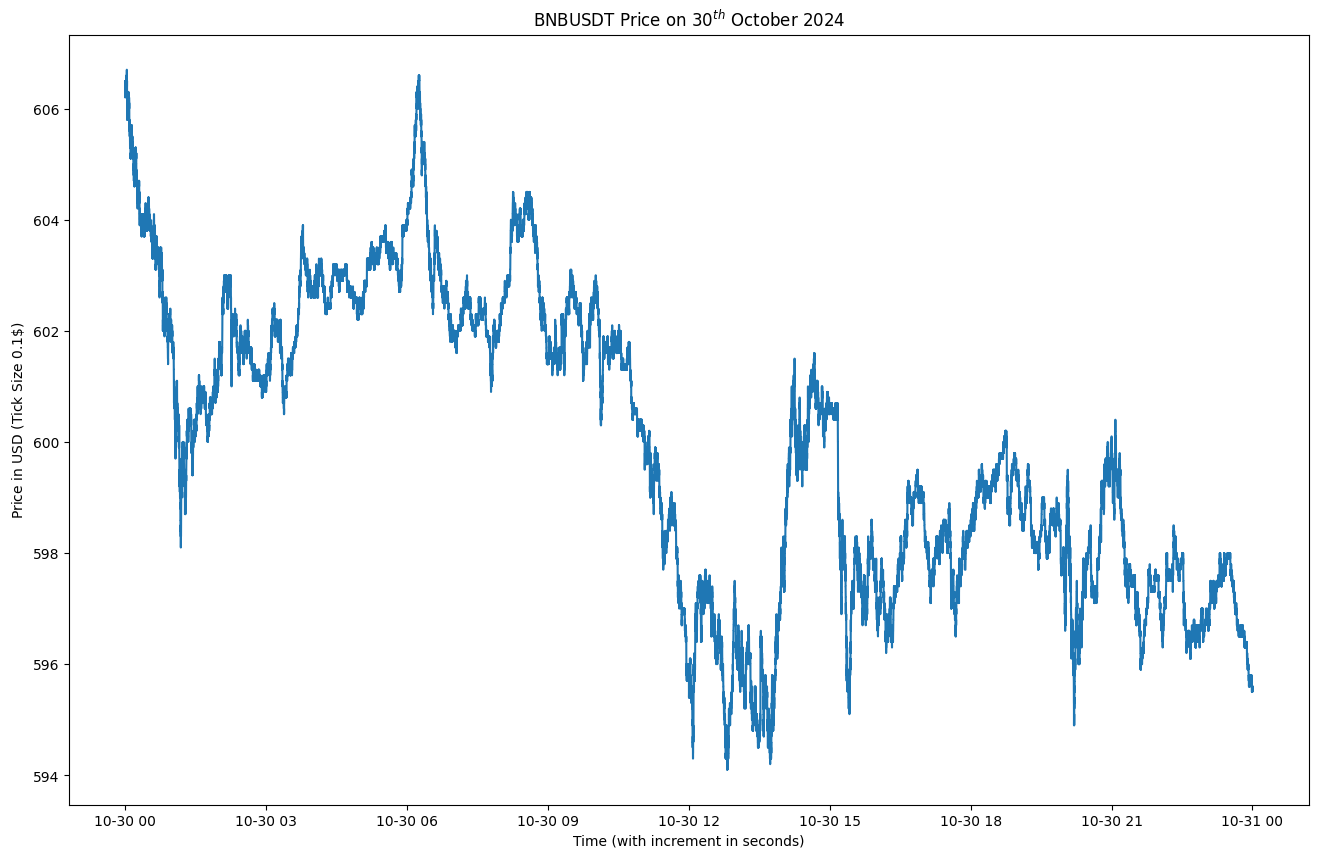

In [6]:
plt.figure(figsize=(16, 10))
plt.plot(data.close)
plt.title("BNBUSDT Price on $30^{th}$ October 2024")
plt.xlabel("Time (with increment in seconds)")
plt.ylabel("Price in USD (Tick Size $0.1\$$)")
plt.show()

In [7]:
np.any(data['REFPRICE']['BTCUSDT'].rp % 2 == 0)

False

In [14]:
data['REFPRICE']['BTCUSDT'].rp.diff(1).round().value_counts()[data['REFPRICE']['BTCUSDT'].rp.diff(1).round().value_counts() > 100]

rp
 0.0     2317395
-1.0       88678
 1.0       34005
-2.0       12497
-3.0       11318
          ...   
-98.0        107
-86.0        104
 89.0        103
-91.0        103
-94.0        101
Name: count, Length: 193, dtype: int64

In [15]:
num_jumps = data['REFPRICE']['BTCUSDT'].rp.diff(1).round()
num_jumps

timestamp
2025-02-09 07:12:01.814    NaN
2025-02-09 07:12:01.914    0.0
2025-02-09 07:12:02.014    0.0
2025-02-09 07:12:02.067    0.0
2025-02-09 07:12:02.069    0.0
                          ... 
2025-02-10 01:29:51.014    0.0
2025-02-10 01:29:51.114    0.0
2025-02-10 01:29:51.214    0.0
2025-02-10 01:29:51.314    0.0
2025-02-10 01:29:51.414    0.0
Name: rp, Length: 2763399, dtype: float64

In [18]:
num_jumps[num_jumps >=0].reset_index().timestamp#.diff(1)

0         2025-02-09 07:12:01.914
1         2025-02-09 07:12:02.014
2         2025-02-09 07:12:02.067
3         2025-02-09 07:12:02.069
4         2025-02-09 07:12:02.071
                    ...          
2510437   2025-02-10 01:29:51.014
2510438   2025-02-10 01:29:51.114
2510439   2025-02-10 01:29:51.214
2510440   2025-02-10 01:29:51.314
2510441   2025-02-10 01:29:51.414
Name: timestamp, Length: 2510442, dtype: datetime64[ns]

In [19]:
num_jumps[num_jumps<= 0].reset_index().timestamp.diff(1)

0                            NaT
1         0 days 00:00:00.100000
2         0 days 00:00:00.053000
3         0 days 00:00:00.002000
4         0 days 00:00:00.002000
                   ...          
2570346   0 days 00:00:00.100000
2570347   0 days 00:00:00.100000
2570348   0 days 00:00:00.100000
2570349   0 days 00:00:00.100000
2570350   0 days 00:00:00.100000
Name: timestamp, Length: 2570351, dtype: timedelta64[ns]

In [20]:
np.diff(np.float64(num_jumps[num_jumps > 0].reset_index().timestamp))

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       3.99974400e+06, 2.24030001e+10, 5.35600000e+09])

Text(0.5, 0, 'Time (in seconds)')

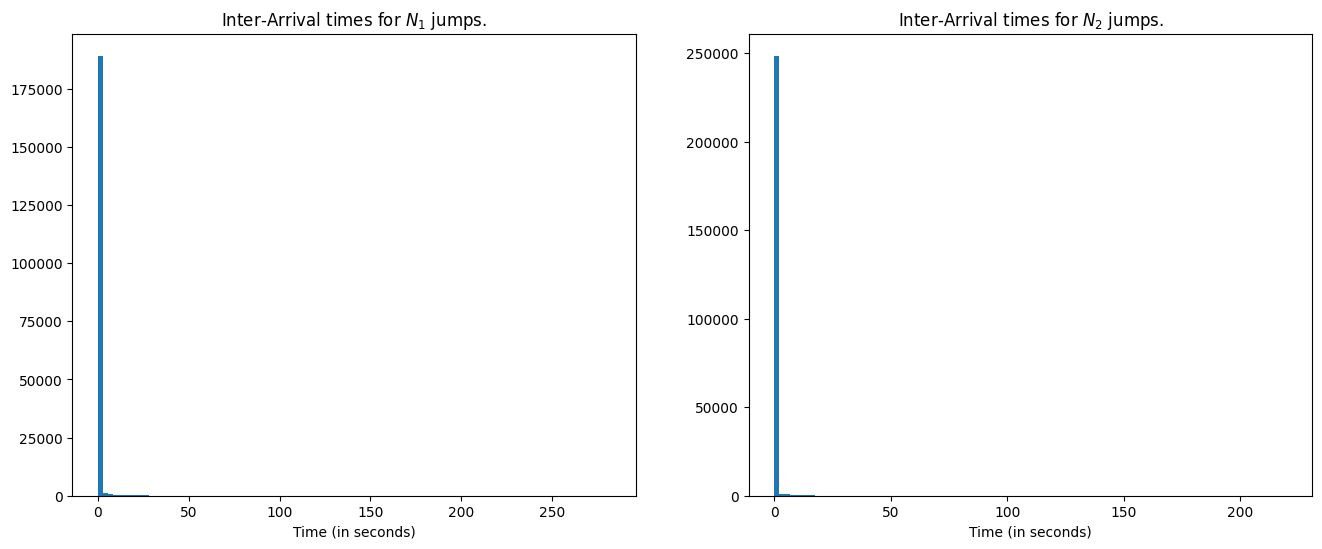

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].hist(np.diff(np.float64(num_jumps[num_jumps > 0].reset_index().timestamp))/10**9, bins=100)
ax[0].set_title('Inter-Arrival times for $N_1$ jumps.')
ax[0].set_xlabel('Time (in seconds)')

ax[1].hist(np.diff(np.float64(num_jumps[num_jumps < 0].reset_index().timestamp))/10**9, bins=100)
ax[1].set_title('Inter-Arrival times for $N_2$ jumps.')
ax[1].set_xlabel('Time (in seconds)')

### Signature Plot

In [134]:
DATE = '09-02-2025-NOON'
CRYPTO_PAIRS = ['BTCUSDT', 'ETHUSDT']
TICK_SIZES = { crypto_pair: 1e-2 for crypto_pair in CRYPTO_PAIRS }
LOT_SIZES = { 'BTCUSDT': 1e-5, 'ETHUSDT': 1e-4 }
ODB_DEPTH = 10
print(f'Loading Data of {DATE} for {CRYPTO_PAIRS}...')

Loading Data of 09-02-2025-NOON for ['BTCUSDT', 'ETHUSDT']...


In [135]:
# load data csv
data = {
    'DEPTH': { crypto_pair: pd.read_csv(f"../data/{DATE}/BINANCE-{crypto_pair}-DEPTH.csv") for crypto_pair in tqdm(CRYPTO_PAIRS) },
    'TRADE': { crypto_pair: pd.read_csv(f"../data/{DATE}/BINANCE-{crypto_pair}-TRADES.csv") for crypto_pair in tqdm(CRYPTO_PAIRS) }
}

# convert time column to datetime timestamps and then move it to index
for crypto_pair in CRYPTO_PAIRS:

    # remove the unecessary columns
    data['DEPTH'][crypto_pair].drop('timestamp', axis=1, inplace=True)
    data['TRADE'][crypto_pair].drop(['timestamp', 'E'], axis=1, inplace=True)

    data['DEPTH'][crypto_pair].E = pd.to_datetime(data['DEPTH'][crypto_pair].loc[:, 'E'], unit='ms')
    data['TRADE'][crypto_pair].T = pd.to_datetime(data['TRADE'][crypto_pair].loc[:, 'T'], unit='ms')

    data['DEPTH'][crypto_pair].set_index('E', inplace=True)
    data['TRADE'][crypto_pair].set_index('T', inplace=True)

    # sort index to prevent any discrepency
    # kind='mergesort' is important as we want the original order intact in case of ties
    data['DEPTH'][crypto_pair].sort_index(kind='mergesort', inplace=True)
    data['TRADE'][crypto_pair].sort_index(kind='mergesort', inplace=True)

    data['DEPTH'][crypto_pair].index.name = 'timestamp'
    data['TRADE'][crypto_pair].index.name = 'timestamp'

100%|██████████| 2/2 [00:02<00:00,  1.27s/it]


In [136]:
data['DEPTH']['BTCUSDT']

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000,96989.99,96989.98,96989.97,96989.96,96989.91,96989.90,96989.81,96989.80,96989.79,96989.78,10.69103,0.00018,0.00018,0.00018,0.00030,0.05862,0.00030,0.73024,0.00012,0.00012,96990.00,96990.30,96990.43,96990.46,96990.47,96990.66,96990.76,96990.84,96991.33,96991.34,20.50288,0.00029,0.00018,0.00030,0.00018,0.00018,0.00018,0.00018,0.00024,0.01057
2025-02-09 07:12:01.814,96989.99,96989.98,96989.97,96989.96,96989.91,96989.90,96989.81,96989.80,96989.79,96989.78,11.48073,0.00018,0.00018,0.00018,0.00030,0.05862,0.00030,0.73024,0.00012,0.00012,96990.00,96990.30,96990.43,96990.46,96990.47,96990.66,96990.76,96990.84,96991.33,96991.34,20.50288,0.00029,0.00018,0.00030,0.00018,0.00018,0.00018,0.00018,0.00024,0.01057
2025-02-09 07:12:01.914,96989.99,96989.98,96989.97,96989.96,96989.91,96989.90,96989.81,96989.80,96989.79,96989.78,11.48073,0.00018,0.00018,0.00018,0.00030,0.05862,0.00030,0.73024,0.00012,0.00012,96990.00,96990.30,96990.43,96990.46,96990.47,96990.66,96990.76,96990.84,96991.33,96991.34,20.50288,0.00029,0.00018,0.00030,0.00018,0.00018,0.00018,0.00018,0.00024,0.01057
2025-02-09 07:12:02.014,96989.99,96989.98,96989.97,96989.96,96989.91,96989.90,96989.81,96989.80,96989.79,96989.78,11.48073,0.00018,0.00018,0.00018,0.00030,0.05862,0.00030,0.73024,0.00012,0.00012,96990.00,96990.30,96990.43,96990.46,96990.47,96990.66,96990.76,96990.84,96991.33,96991.34,20.50288,0.00029,0.00018,0.00030,0.00018,0.00018,0.00018,0.00018,0.00024,0.01057
2025-02-09 07:12:02.114,96989.99,96989.98,96989.97,96989.96,96989.91,96989.90,96989.81,96989.80,96989.79,96989.78,11.47977,0.00018,0.00018,0.00018,0.00030,0.05862,0.00030,0.73024,0.00012,0.00012,96990.00,96990.30,96990.43,96990.46,96990.47,96990.66,96990.76,96990.84,96991.33,96991.34,20.48261,0.00029,0.00018,0.00030,0.00018,0.00018,0.00018,0.00018,0.00024,0.01057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:29:51.014,96200.00,96199.93,96199.28,96199.22,96198.76,96198.75,96198.60,96198.21,96198.01,96198.00,10.35129,0.00037,0.00029,0.00025,0.00018,0.00018,0.00018,0.00029,0.00024,0.07152,96200.01,96200.35,96200.36,96200.37,96200.38,96200.56,96200.79,96201.12,96201.15,96201.53,6.21713,0.00018,0.24375,0.07359,0.00006,0.00006,0.00013,0.00772,0.06144,0.00006
2025-02-10 01:29:51.114,96200.00,96199.93,96199.28,96199.22,96198.76,96198.75,96198.60,96198.21,96198.01,96198.00,10.35129,0.00037,0.00029,0.00025,0.00018,0.00018,0.00018,0.00029,0.00024,0.07152,96200.01,96200.35,96200.36,96200.37,96200.38,96200.56,96200.79,96201.12,96201.15,96201.53,6.21720,0.00018,0.24375,0.07359,0.00006,0.00006,0.00013,0.00772,0.06144,0.00006
2025-02-10 01:29:51.214,96200.00,96199.93,96199.28,96199.22,96198.76,96198.75,96198.60,96198.21,96198.01,96198.00,10.35129,0.00037,0.00029,0.00025,0.00018,0.00018,0.00018,0.00029,0.00024,0.07152,96200.01,96200.35,96200.36,96200.37,96200.38,96200.56,96200.79,96201.12,96201.15,96201.53,6.21720,0.00018,0.24375,0.07359,0.00006,0.00006,0.00013,0.00761,0.06084,0.00006


In [137]:
data['TRADE']['BTCUSDT']

,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:01.423,96990.00,0.00689,0
2025-02-09 07:12:01.502,96990.00,0.00013,0
2025-02-09 07:12:01.544,96990.00,0.00102,0
2025-02-09 07:12:01.544,96990.00,0.00009,0
2025-02-09 07:12:01.544,96990.00,0.00306,0
...,...,...,...
2025-02-10 01:30:33.416,96212.19,0.00006,0
2025-02-10 01:30:33.416,96212.19,0.00006,0
2025-02-10 01:30:33.577,96212.19,0.00233,1


In [138]:
for crypto_pair in tqdm(CRYPTO_PAIRS):
    # the first row requires syncing orderbook so the timestamp in it is `0` which is not valid. So, we simply drop it.
    data['DEPTH'][crypto_pair].drop(data['DEPTH'][crypto_pair].index[:1], inplace=True)
    # only keep the trades that happen between the first and last timestamp in the depth dataframe
    data['TRADE'][crypto_pair] = data['TRADE'][crypto_pair][np.logical_and(data['TRADE'][crypto_pair].index >= data['DEPTH'][crypto_pair].index[0], data['TRADE'][crypto_pair].index <= data['DEPTH'][crypto_pair].index[-1])]

100%|██████████| 2/2 [00:00<00:00, 10.76it/s]


In [139]:
data['TRADE']['BTCUSDT']

,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:02.067,96990.00,0.00015,0
2025-02-09 07:12:02.069,96990.00,0.02000,0
2025-02-09 07:12:02.071,96989.99,0.00096,1
2025-02-09 07:12:02.464,96990.00,0.01374,0
2025-02-09 07:12:03.252,96990.00,0.00289,0
...,...,...,...
2025-02-10 01:29:48.730,96200.01,0.01642,0
2025-02-10 01:29:49.639,96200.00,0.00029,1
2025-02-10 01:29:49.970,96200.01,0.00006,0


In [140]:
print('Checking for gaps in the depth data captured with time difference > 400ms...')
# No big gaps hence the integrity of the data upholds
for crypto_pair in CRYPTO_PAIRS:
    print(pd.Series(data['DEPTH'][crypto_pair].index).diff()[pd.Series(data['DEPTH'][crypto_pair].index).diff() > timedelta(milliseconds=400)])
# orderbook snapshots come on an average with a delay of 100ms and we are good.
# trades on the otherhand are real-time and can have occassional large gaps.

Checking for gaps in the depth data captured with time difference > 400ms...
Series([], Name: timestamp, dtype: timedelta64[ns])
Series([], Name: timestamp, dtype: timedelta64[ns])


### Preprocess Data

In [141]:
print('Preprocessing Data...')
# convert all the data from floating point to integers to make easier queue related calculations
for crypto_pair in tqdm(CRYPTO_PAIRS):
    data['DEPTH'][crypto_pair].loc[:, [f'bp{i}' for i in range(1, ODB_DEPTH+1)] + [f'ap{i}' for i in range(1, ODB_DEPTH+1)]] = data['DEPTH'][crypto_pair].loc[:, [f'bp{i}' for i in range(1, ODB_DEPTH+1)] + [f'ap{i}' for i in range(1, ODB_DEPTH+1)]] / TICK_SIZES[crypto_pair]
    data['DEPTH'][crypto_pair].loc[:, [f'bv{i}' for i in range(1, ODB_DEPTH+1)] + [f'av{i}' for i in range(1, ODB_DEPTH+1)]] = data['DEPTH'][crypto_pair].loc[:, [f'bv{i}' for i in range(1, ODB_DEPTH+1)] + [f'av{i}' for i in range(1, ODB_DEPTH+1)]] / LOT_SIZES[crypto_pair]
    data['TRADE'][crypto_pair].loc[:, 'p'] = data['TRADE'][crypto_pair].p / TICK_SIZES[crypto_pair]
    data['TRADE'][crypto_pair].loc[:, 'q'] = data['TRADE'][crypto_pair].q / LOT_SIZES[crypto_pair]
    data['DEPTH'][crypto_pair].fillna(-1, inplace=True)
    data['TRADE'][crypto_pair].fillna(-1, inplace=True)
    data['DEPTH'][crypto_pair] = data['DEPTH'][crypto_pair].round().astype(int)
    data['TRADE'][crypto_pair] = data['TRADE'][crypto_pair].round().astype(int)

Preprocessing Data...


  0%|          | 0/2 [00:00<?, ?it/s]/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_42005/3783433093.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TRADE'][crypto_pair].fillna(-1, inplace=True)
100%|██████████| 2/2 [00:00<00:00,  2.71it/s]


In [142]:
data['DEPTH']['BTCUSDT'].head(10)

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:01.814,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1148073,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2050288,29,18,30,18,18,18,18,24,1057
2025-02-09 07:12:01.914,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1148073,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2050288,29,18,30,18,18,18,18,24,1057
2025-02-09 07:12:02.014,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1148073,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2050288,29,18,30,18,18,18,18,24,1057
2025-02-09 07:12:02.114,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1147977,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2048261,29,18,30,18,18,18,18,24,1057
2025-02-09 07:12:02.214,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1147894,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2048273,29,18,18,18,18,18,18,24,1057
2025-02-09 07:12:02.314,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1147978,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2048273,29,18,18,18,18,18,18,24,1057
2025-02-09 07:12:02.414,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1147978,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2048261,29,18,18,18,18,18,18,24,1057
2025-02-09 07:12:02.514,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1145327,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2046887,29,18,18,18,18,18,18,24,1057
2025-02-09 07:12:02.614,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1147980,18,18,18,30,5862,30,73024,12,12,9699000,9699022,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,2046911,30,29,18,18,18,18,18,12,24


In [143]:
data['TRADE']['BTCUSDT'].head(10)

,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:02.067,9699000,15,0
2025-02-09 07:12:02.069,9699000,2000,0
2025-02-09 07:12:02.071,9698999,96,1
2025-02-09 07:12:02.464,9699000,1374,0
2025-02-09 07:12:03.252,9699000,289,0
2025-02-09 07:12:03.255,9699000,2000,0
2025-02-09 07:12:03.373,9699000,509,0
2025-02-09 07:12:03.751,9699000,369,0
2025-02-09 07:12:03.758,9699000,220,0


In [144]:
hehe = pd.to_datetime('2025-02-09 22:14:39.696')

In [145]:
# store the best prices and orders at new limit levels
best_prices = { crypto_pair: {'timestamp': list(), 'bp1': list(), 'ap1': list(), 'trade': list(), 'newlim': list()} for crypto_pair in CRYPTO_PAIRS }
# stores the trade orderbooks
trade_odbs = {crypto_pair: list() for crypto_pair in CRYPTO_PAIRS}
# stores the cancel orders
trade_cancel_orders = {crypto_pair: {'bid': list(), 'ask': list()} for crypto_pair in CRYPTO_PAIRS}

for crypto_pair in CRYPTO_PAIRS:
# for crypto_pair in ['ETHUSDT']:

    # convert the depth dataset into dictionary of price: val for easier handling
    odb_df2dict = data['DEPTH'][crypto_pair].to_dict(orient='records')
    odb_dict = copy.deepcopy(odb_df2dict)
    odb_tup_keys = [(f'bp{i}', f'bv{i}') for i in range(10, 0, -1)] + [(f'ap{i}', f'av{i}') for i in range(1, 11)]
    for i in tqdm(range(len(odb_dict))):
        odb_dict[i] = { odb_dict[i][p]: odb_dict[i][q] for p, q in odb_tup_keys }
        odb_dict[i]['t'] = data['DEPTH'][crypto_pair].index[i]
    
    # convert the trade dataset into dictionary of price: val for easier handling
    trade_dict = data['TRADE'][crypto_pair].to_dict(orient='records')
    for i in tqdm(range(len(trade_dict))):
        trade_dict[i] = { trade_dict[i]['p']: trade_dict[i]['q'], 'mm_buy': trade_dict[i]['mm_buy'] }
        trade_dict[i]['t'] = data['TRADE'][crypto_pair].index[i]

    odb_ptr, trade_ptr = 0, 0
    # next_odb = dict()
    temp_odb = dict() # accounts for cancelled orders that appear in between two orderbook depth snapshots [TO THE BEST OF KNOWLEDGE]
    temp_limits = dict() # accounts for new limit orders that appear in between two orderbook depth snapshots [TO THE BEST OF KNOWLEDGE]
    temp_best_bid, temp_best_ask = -1, -1 # -1 means undefined
    temp_prev_best_bid, temp_prev_best_ask = -1, -1 # stores them in case updating the best bid/best ask makes the current trade look like being on the wrong direction
    temp_best_bid_estimate, temp_best_ask_estimate = -1, -1 # in case one side of the orderbook is wiped. This stores the trade price on the missing side as the best price estimate
    is_newlim = 0 # indicator for whether the current trade is at a new limit level that is not accounted before
    bid_cancel_orders = dict() # stores the cancelled bid orders
    ask_cancel_orders = dict() # stores the cancelled ask orders

    for i in tqdm(range(len(odb_dict) + len(trade_dict))):

        if trade_ptr >= len(trade_dict) or odb_dict[odb_ptr]['t'] <= trade_dict[trade_ptr]['t']:

            # stores the current state of the orderbook depth
            temp_odb = copy.deepcopy(odb_dict[odb_ptr])
            del temp_odb['t']

            # TODO: deal with cancel orders here when the reference price changes after the last trade due to cancel orders in between

            if i > 0:
                temp_prev_best_bid = temp_best_bid
                temp_prev_best_ask = temp_best_ask
            temp_best_bid = odb_df2dict[odb_ptr]['bp1'] #temp_odb_list[9]
            temp_best_ask = odb_df2dict[odb_ptr]['ap1'] # temp_odb_list[10]
            if i == 0:
                temp_prev_best_bid = temp_best_bid
                temp_prev_best_ask = temp_best_ask
            
            # if the orderbook is less than 10 limits then -1s will be present in the keys remove them
            if -1 in temp_odb:
                del temp_odb[-1]

            # # stores the next state of the orderbook depth
            # next_odb = copy.deepcopy(odb_dict[odb_ptr+1])

            # print('------------- LIMIT ORDERBOOK SNAPSHOT -------------')
            # print('CURR ODB:', odb_dict[odb_ptr])
            # print('----------------------------------------------------')
            # print()

            best_prices[crypto_pair]['timestamp'].append(odb_dict[odb_ptr]['t'])
            best_prices[crypto_pair]['ap1'].append(temp_best_ask if temp_best_ask != -1 else temp_best_ask_estimate)
            best_prices[crypto_pair]['bp1'].append(temp_best_bid if temp_best_bid != -1 else temp_best_bid_estimate)
            best_prices[crypto_pair]['trade'].append(0)
            best_prices[crypto_pair]['newlim'].append(0)

            temp_limits = dict()
            bid_cancel_orders = dict() # TODO: deal with cancel orders here when the reference price changes after the last trade due to cancel orders in between
            ask_cancel_orders = dict() # TODO: deal with cancel orders here when the reference price changes after the last trade due to cancel orders in between
            odb_ptr += 1

        else:

            # get all the info from the trade
            trade_dict_list = list(trade_dict[trade_ptr].items())
            # get the price and quantity of trade
            p, q = trade_dict_list[0]
            # direction of trade
            mm_buy = trade_dict_list[1][-1]
            # time of trade
            t = trade_dict_list[-1][-1]

            # if it is a MM buy
            if mm_buy:
                prices = list(temp_odb.keys())
                # try to find better prices only when temp_best_bid is defined
                # o.w. most likely the ask side of the orderbook upto 10 limits which we keep track of is missing/lifted
                if temp_best_bid != -1:
                    # iterate over the temp_odb
                    for price in prices:
                        # check if there are better bid prices than p
                        if price <= temp_best_bid and price > p:
                            # if there are that means they are cancelled before this trade happened
                            bid_cancel_orders[price] = temp_odb[price]
                            del temp_odb[price]
                            # if the price which we deleted was the temp_best_bid
                            if price == temp_best_bid:
                                temp_prev_best_bid = temp_best_bid
                                # then set it to p
                                temp_best_bid = p
                    
                    if p < temp_best_bid:
                        temp_prev_best_bid = temp_best_bid
                        # then set it to p
                        temp_best_bid = p
            else:
                # do the same thing but for the sell side
                prices = list(temp_odb.keys())
                # try to find better prices only when temp_best_ask is defined
                # o.w. most likely the sell side of the orderbook upto 10 limits which we keep track of is missing/lifted
                if temp_best_ask != -1:
                    for price in prices[::-1]:
                        # check if there are better offer prices than p
                        if price >= temp_best_ask and price < p:
                            # if there are that means they are cancelled before this trade happened
                            ask_cancel_orders[price] = temp_odb[price]
                            del temp_odb[price]
                            # if the price which we deleted was the temp_best_ask
                            if price == temp_best_ask:
                                temp_prev_best_ask = temp_best_ask
                                # then set it to p
                                temp_best_ask = p
                    
                    if p > temp_best_ask:
                        temp_prev_best_ask = temp_best_ask
                        temp_best_ask = p

            # if the price is present in the temp_orderbook we are maintaining
            if p in temp_odb:

                # make sure that it is not the case that the orderbook snapshot's bid level is now getting a MM sell trade
                # which can happen if after we have the orderbook snapshot the best bid moves down and the previous best bid now becomes best ask
                # therefore getting MM sell trade
                if (mm_buy and (p <= temp_best_bid if temp_best_bid != -1 else p <= temp_best_bid_estimate)) \
                    or ((not mm_buy) and (p >= temp_best_ask if temp_best_ask != -1 else p >= temp_best_ask_estimate)):
                
                    # check if the quantity traded at this price is possible
                    # o.w. it will mean new limit orders were added at this price level before this trade occured
                    if temp_odb[p] < q:
                        # Add this to the temp_limits dictionary to keep track of this inferred new limit order from this trade
                        # we are sure that there is atleast this much quantity of limit order added here (maybe even more, no way of being sure)
                        temp_limits[p] = temp_limits.get(p, 0) + q - temp_odb[p]
                        best_prices[crypto_pair]['newlim'].append((q - temp_odb[p]) * (1-2*mm_buy))
                        is_newlim = 1
                    else:
                        # the quantity of the trade is possible

                        # if temp_limits does not have this price level then we can safely subtract the quantity as no new limit order was added at this price level
                        if not temp_limits.get(p, 0):
                            temp_odb[p] -= q

                            # if all the quantity at this price level is exhausted remove the level
                            if temp_odb[p] == 0:
                                del temp_odb[p]

                                # set the temp_best_bid/temp_best_ask accordingly
                                if mm_buy == 1 and p == temp_best_bid:
                                    worse_prices = np.array([price for price in temp_odb.keys() if price < p])
                                    temp_prev_best_bid = temp_best_bid
                                    temp_best_bid = max(worse_prices) if worse_prices.shape[0] else -1
                                    # the best estimate of temp_best_bid
                                    if not worse_prices.shape[0]:
                                        temp_best_bid_estimate = p
                                
                                if mm_buy == 0 and p == temp_best_ask:
                                    worse_prices = np.array([price for price in temp_odb.keys() if price > p])
                                    temp_prev_best_ask = temp_best_ask
                                    temp_best_ask = min(worse_prices) if worse_prices.shape[0] else -1
                                    # the best estimate of temp_best_ask
                                    if not worse_prices.shape[0]:
                                        temp_best_ask_estimate = p
                
                else:

                    # this means we have got some trades in the spread and will definitely update the best bid/best ask
                    if mm_buy:
                        temp_prev_best_bid = temp_best_bid
                        temp_best_bid = p
                    else:
                        temp_prev_best_ask = temp_best_ask
                        temp_best_ask = p
                    
                    # add it to the temp_limits as this is a new limit order
                    temp_limits[p] = q
                    best_prices[crypto_pair]['newlim'].append(q * (1-2*mm_buy))
                    is_newlim = 1
                    
                    # now it might happen that the best bid has now crossed the previous best ask in which case we need to cancel all the asks in between
                    if mm_buy and p >= temp_best_ask:
                        
                        # cancel all intermediate asks
                        prices = list(temp_odb.keys())

                        for price in prices:

                            if price >= temp_best_ask and price <= p:
                                
                                # remove the ask price
                                ask_cancel_orders[price] = temp_odb[price]
                                del temp_odb[price]
                        
                        worse_prices = np.array([price for price in temp_odb.keys() if price > p])
                        temp_prev_best_ask = temp_best_ask
                        temp_best_ask = min(worse_prices) if worse_prices.shape[0] else -1
                        # the best estimate of temp_best_ask
                        if not worse_prices.shape[0]: # it is rare case that the entire ask side is cancelled and we get a trade of MM buy beyond that
                            # if all the prices are exhausted on the other sell side then there is no way of inferring the best ask except for looking into the next orderbook state
                            worse_next_odb_prices = [price for price in list(odb_dict[odb_ptr].keys())[10:] if price != 't' and price > p]
                            # if looking into the next orderbook state does not give us the best ask then simply set it to this buy order price
                            temp_best_ask_estimate = min(worse_next_odb_prices) if len(worse_next_odb_prices) else p+1 # if we don't find any price in the next orderbook also then heuristically put p+1
                    
                    # now it might happen that the best ask has now crossed the previous best bid in which case we need to cancell all the bids in between
                    if (not mm_buy) and p <= temp_best_bid:

                        # cancel all intermediate bids
                        prices = list(temp_odb.keys())

                        for price in prices:

                            if price <= temp_best_bid and price >= p:

                                # remove the bid price
                                bid_cancel_orders[price] = temp_odb[price]
                                del temp_odb[price]
                        
                        worse_prices = np.array([price for price in temp_odb.keys() if price < p])
                        temp_prev_best_bid = temp_best_bid
                        temp_best_bid = max(worse_prices) if worse_prices.shape[0] else -1
                        # the best estimate of temp_best_bid
                        if not worse_prices.shape[0]:
                            # if all the prices are exhausted on the other side there is no way of inferring the best bid except for looking into the next orderbook state
                            worse_next_odb_prices = [price for price in list(odb_dict[odb_ptr].keys())[:10] if price < p]
                            # if looking into next orderbook state does not give the required best bid then simply set it to this sell order price
                            temp_best_bid_estimate = max(worse_next_odb_prices) if len(worse_next_odb_prices) else p-1 # if we don't find any price in the next orderbook also then heuristically put p-1

            # if the price is not present in the temp_orderbook we are maintaining
            else:

                if (mm_buy and (p > temp_best_bid if temp_best_bid != -1 else p > temp_best_bid_estimate)) \
                    or ((not mm_buy) and (p < temp_best_ask if temp_best_ask != -1 else p < temp_best_ask_estimate)):

                    # this means we have got some trades in the spread and will definitely update the best bid/best ask
                    if mm_buy:
                        temp_prev_best_bid = temp_best_bid
                        temp_best_bid = p

                        # the ask side of the orderbook is exhausted and the best bid now equal to the best ask
                        if temp_best_ask == -1 and temp_best_bid >= temp_best_ask_estimate:
                            # if all the prices are exhausted on the other sell side then there is no way of inferring the best ask except for looking into the next orderbook state
                            worse_next_odb_prices = [price for price in list(odb_dict[odb_ptr].keys())[10:] if price != 't' and price > p]
                            # if looking into the next orderbook state does not give us the best ask then simply set it to this buy order price
                            temp_best_ask_estimate = min(worse_next_odb_prices) if len(worse_next_odb_prices) else p+1 # if we don't find any price in the next orderbook also then heuristically put p+1
                    else:
                        temp_prev_best_ask = temp_best_ask
                        temp_best_ask = p

                        # the bid side of the orderbook is exhausted and the best ask now becomes equal to the best bid
                        if temp_best_bid == -1 and temp_best_ask <= temp_best_bid_estimate:
                            # if all the prices are exhausted on the other side there is no way of inferring the best bid except for looking into the next orderbook state
                            worse_next_odb_prices = [price for price in list(odb_dict[odb_ptr].keys())[:10] if price < p]
                            # if looking into next orderbook state does not give the required best bid then simply set it to this sell order price
                            temp_best_bid_estimate = max(worse_next_odb_prices) if len(worse_next_odb_prices) else p-1 # if we don't find any price in the next orderbook also then heuristically put p+1
                    
                    # add it to the temp_limits as this is a new limit order
                    temp_limits[p] = q
                    best_prices[crypto_pair]['newlim'].append(q * (1-2*mm_buy))
                    is_newlim = 1

                    # now it might happen that the best bid has now crossed the previous best ask in which case we need to cancel all the asks in between
                    if mm_buy and p >= (temp_best_ask if temp_best_ask != -1 else temp_best_ask_estimate):
                        
                        # cancel all intermediate asks
                        prices = list(temp_odb.keys())

                        for price in prices:

                            if price >= temp_best_ask and price <= p:
                                
                                # remove the ask price
                                ask_cancel_orders[price] = temp_odb[price]
                                del temp_odb[price]
                        
                        worse_prices = np.array([price for price in temp_odb.keys() if price > p])
                        temp_prev_best_ask = temp_best_ask
                        temp_best_ask = min(worse_prices) if worse_prices.shape[0] else -1
                        # the best estimate of temp_best_ask
                        if not worse_prices.shape[0]: # it is rare case that the entire ask side is cancelled and we get a trade of MM buy beyond that
                            # if all the prices are exhausted on the other sell side then there is no way of inferring the best ask except for looking into the next orderbook state
                            worse_next_odb_prices = [price for price in list(odb_dict[odb_ptr].keys())[10:] if price != 't' and price > p]
                            # if looking into the next orderbook state does not give us the best ask then simply set it to this buy order price
                            temp_best_ask_estimate = min(worse_next_odb_prices) if len(worse_next_odb_prices) else p+1 # if we don't find any price in the next orderbook also then heuristically put p+1
                    
                    # now it might happen that the best ask has now crossed the previous best bid in which case we need to cancell all the bids in between
                    if (not mm_buy) and p <= (temp_best_bid if temp_best_bid != -1 else temp_best_bid_estimate):

                        # cancel all intermediate bids
                        prices = list(temp_odb.keys())

                        for price in prices:

                            if price <= temp_best_bid and price >= p:

                                # remove the bid price
                                bid_cancel_orders[price] = temp_odb[price]
                                del temp_odb[price]
                        
                        worse_prices = np.array([price for price in temp_odb.keys() if price < p])
                        temp_prev_best_bid = temp_best_bid
                        temp_best_bid = max(worse_prices) if worse_prices.shape[0] else -1
                        # the best estimate of temp_best_bid
                        if not worse_prices.shape[0]:
                            # if all the prices are exhausted on the other side there is no way of inferring the best bid except for looking into the next orderbook state
                            worse_next_odb_prices = [price for price in list(odb_dict[odb_ptr].keys())[:10] if price < p]
                            # if looking into next orderbook state does not give the required best bid then simply set it to this sell order price
                            temp_best_bid_estimate = max(worse_next_odb_prices) if len(worse_next_odb_prices) else p-1 # if we don't find any price in the next orderbook also then heuristically put p+1
                    
                else:

                    # This means that there is had been new limit orders waiting in the orderbook when the trade occurred
                    # Check if we have already accounted for this new trade
                    # if we have done so, then we can now say that the agg quantity at this new level was more than what we inferred before
                    # o.w. we have info that there are new limit orders at this new level with agg quantity at least that of the trade
                    temp_limits[p] = temp_limits.get(p, 0) + q
                    best_prices[crypto_pair]['newlim'].append(q * (1-2*mm_buy))
                    is_newlim = 1

                    # in case of missing side of orderbook we infer the trade price to happen at the best bid/best ask on the resp side (which is obv true)
                    if temp_best_ask == -1 and mm_buy == 0:
                        temp_best_ask_estimate = p
                    
                    if temp_best_bid == -1 and mm_buy == 1:
                        temp_best_bid_estimate = p

            # print(trade_dict[trade_ptr])
            # print('TEMP ODB:', temp_odb)
            # print('TEMP LIM:', temp_limits)
            # print(f'BEST BID: {temp_best_bid if temp_best_bid != -1 else temp_best_bid_estimate}, BEST ASK: {temp_best_ask if temp_best_ask != -1 else temp_best_ask_estimate}')
            # print()

            bb = temp_best_bid if temp_best_bid != -1 else temp_best_bid_estimate
            ba = temp_best_ask if temp_best_ask != -1 else temp_best_ask_estimate
            mp = (bb+ba)/2.0 # mid price

            # if the current buy order changes the mid price such that p > mp then we update the best bid to be inserted to the previous one
            # it happens mostly because some level got cleared hence updating the best bid but it makes the current trade look as if on the wrong side
            if mm_buy and p > mp:
                bb = temp_prev_best_bid if temp_best_bid != -1 else temp_best_bid_estimate
            
            # same for the ask side
            if (not mm_buy) and p < mp:
                ba = temp_prev_best_ask if temp_best_bid != -1 else temp_best_bid_estimate

            # store the temporary orderbooks at each trade and newly added limits to the lists
            trade_odbs[crypto_pair].append((t, copy.deepcopy(temp_odb)))

            # store the cancelled orders at each trade
            trade_cancel_orders[crypto_pair]['bid'].append(bid_cancel_orders)
            trade_cancel_orders[crypto_pair]['ask'].append(ask_cancel_orders)
            bid_cancel_orders, ask_cancel_orders = dict(), dict()

            best_prices[crypto_pair]['timestamp'].append(trade_dict[trade_ptr]['t'])
            best_prices[crypto_pair]['ap1'].append(ba)
            best_prices[crypto_pair]['bp1'].append(bb)
            best_prices[crypto_pair]['trade'].append(1)
            if is_newlim == 0:
                best_prices[crypto_pair]['newlim'].append(0)
            else:
                is_newlim = 0

            trade_ptr += 1

    # create a dataframe out of best_prices
    best_prices[crypto_pair] = pd.DataFrame(best_prices[crypto_pair])
    best_prices[crypto_pair].set_index('timestamp', inplace=True)

data['NEWLIM'] = {crypto_pair: best_prices[crypto_pair].query('trade == 1').copy(deep=True) for crypto_pair in CRYPTO_PAIRS}

100%|██████████| 2676299/2676299 [00:38<00:00, 69264.49it/s]


In [146]:
data['TRADE']['BTCUSDT']

,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:02.067,9699000,15,0
2025-02-09 07:12:02.069,9699000,2000,0
2025-02-09 07:12:02.071,9698999,96,1
2025-02-09 07:12:02.464,9699000,1374,0
2025-02-09 07:12:03.252,9699000,289,0
...,...,...,...
2025-02-10 01:29:48.730,9620001,1642,0
2025-02-10 01:29:49.639,9620000,29,1
2025-02-10 01:29:49.970,9620001,6,0


In [147]:
data['DEPTH']['BTCUSDT']

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:01.814,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1148073,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2050288,29,18,30,18,18,18,18,24,1057
2025-02-09 07:12:01.914,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1148073,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2050288,29,18,30,18,18,18,18,24,1057
2025-02-09 07:12:02.014,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1148073,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2050288,29,18,30,18,18,18,18,24,1057
2025-02-09 07:12:02.114,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1147977,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2048261,29,18,30,18,18,18,18,24,1057
2025-02-09 07:12:02.214,9698999,9698998,9698997,9698996,9698991,9698990,9698981,9698980,9698979,9698978,1147894,18,18,18,30,5862,30,73024,12,12,9699000,9699030,9699043,9699046,9699047,9699066,9699076,9699084,9699133,9699134,2048273,29,18,18,18,18,18,18,24,1057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:29:51.014,9620000,9619993,9619928,9619922,9619876,9619875,9619860,9619821,9619801,9619800,1035129,37,29,25,18,18,18,29,24,7152,9620001,9620035,9620036,9620037,9620038,9620056,9620079,9620112,9620115,9620153,621713,18,24375,7359,6,6,13,772,6144,6
2025-02-10 01:29:51.114,9620000,9619993,9619928,9619922,9619876,9619875,9619860,9619821,9619801,9619800,1035129,37,29,25,18,18,18,29,24,7152,9620001,9620035,9620036,9620037,9620038,9620056,9620079,9620112,9620115,9620153,621720,18,24375,7359,6,6,13,772,6144,6
2025-02-10 01:29:51.214,9620000,9619993,9619928,9619922,9619876,9619875,9619860,9619821,9619801,9619800,1035129,37,29,25,18,18,18,29,24,7152,9620001,9620035,9620036,9620037,9620038,9620056,9620079,9620112,9620115,9620153,621720,18,24375,7359,6,6,13,761,6084,6


In [148]:
best_prices['BTCUSDT'].query('newlim != 0')

,bp1,ap1,trade,newlim
timestamp,,,,
2025-02-09 07:12:10.707,9698999,9699084,1,6
2025-02-09 07:12:10.707,9698999,9699084,1,6
2025-02-09 07:12:10.707,9698999,9699133,1,6
2025-02-09 07:12:10.707,9698999,9699133,1,6
2025-02-09 07:12:10.707,9698999,9699133,1,6
...,...,...,...,...
2025-02-10 01:29:48.528,9620001,9620353,1,-6
2025-02-10 01:29:48.528,9620001,9620353,1,-6
2025-02-10 01:29:48.528,9620001,9620353,1,-6


In [149]:
print('Computing Reference Prices...')
# compute the bid-ask spreads
bid_ask_spreads = { crypto_pair: best_prices[crypto_pair].ap1 - best_prices[crypto_pair].bp1 for crypto_pair in CRYPTO_PAIRS }

# compute the reference price based on https://arxiv.org/pdf/1312.0563 section 2.2.2
reference_prices = { crypto_pair: (best_prices[crypto_pair].bp1 + best_prices[crypto_pair].ap1)/2 for crypto_pair in CRYPTO_PAIRS }

for crypto_pair in CRYPTO_PAIRS:
    even_bid_ask_spread_idx = np.where(bid_ask_spreads[crypto_pair] % 2 == 0)[0]
    candidate_reference_prices = pd.concat([reference_prices[crypto_pair].iloc[even_bid_ask_spread_idx] - 0.5, reference_prices[crypto_pair].iloc[even_bid_ask_spread_idx] + 0.5], axis=1)
    prev_reference_prices = reference_prices[crypto_pair].iloc[even_bid_ask_spread_idx-1].to_numpy()
    reference_prices[crypto_pair].iloc[even_bid_ask_spread_idx] = candidate_reference_prices.to_numpy()[np.arange(candidate_reference_prices.shape[0]), np.argmin(np.abs(candidate_reference_prices.sub(prev_reference_prices, axis=0)), axis=1)]
    reference_prices[crypto_pair].name = 'rp'
    reference_prices[crypto_pair] = pd.concat([reference_prices[crypto_pair], best_prices[crypto_pair].trade], axis=1)


data['REFPRICE'] = copy.deepcopy(reference_prices)

Computing Reference Prices...


In [50]:
data['DEPTH']['BTCUSDT'].bp1

timestamp
1970-01-01 00:00:00.000    96989.99
2025-02-09 07:12:01.814    96989.99
2025-02-09 07:12:01.914    96989.99
2025-02-09 07:12:02.014    96989.99
2025-02-09 07:12:02.114    96989.99
                             ...   
2025-02-10 01:29:51.014    96200.00
2025-02-10 01:29:51.114    96200.00
2025-02-10 01:29:51.214    96200.00
2025-02-10 01:29:51.314    96200.00
2025-02-10 01:29:51.414    96200.00
Name: bp1, Length: 655978, dtype: float64

In [85]:
data['DEPTH']['BTCUSDT'].loc[:,'bv1':'bv10']

,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10
timestamp,,,,,,,,,,
1970-01-01 00:00:00.000,10.69103,0.00018,0.00018,0.00018,0.00030,0.05862,0.00030,0.73024,0.00012,0.00012
2025-02-09 07:12:01.814,11.48073,0.00018,0.00018,0.00018,0.00030,0.05862,0.00030,0.73024,0.00012,0.00012
2025-02-09 07:12:01.914,11.48073,0.00018,0.00018,0.00018,0.00030,0.05862,0.00030,0.73024,0.00012,0.00012
2025-02-09 07:12:02.014,11.48073,0.00018,0.00018,0.00018,0.00030,0.05862,0.00030,0.73024,0.00012,0.00012
2025-02-09 07:12:02.114,11.47977,0.00018,0.00018,0.00018,0.00030,0.05862,0.00030,0.73024,0.00012,0.00012
...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:29:51.014,10.35129,0.00037,0.00029,0.00025,0.00018,0.00018,0.00018,0.00029,0.00024,0.07152
2025-02-10 01:29:51.114,10.35129,0.00037,0.00029,0.00025,0.00018,0.00018,0.00018,0.00029,0.00024,0.07152
2025-02-10 01:29:51.214,10.35129,0.00037,0.00029,0.00025,0.00018,0.00018,0.00018,0.00029,0.00024,0.07152


In [92]:
rp = np.sum(data['DEPTH']['BTCUSDT'].loc[:,'bp1':'bp10'].values * data['DEPTH']['BTCUSDT'].loc[:,'bv1':'bv10'].values + data['DEPTH']['BTCUSDT'].loc[:,'ap1':'ap10'].values * data['DEPTH']['BTCUSDT'].loc[:,'av1':'av10'].values, axis=1) / np.sum(data['DEPTH']['BTCUSDT'].loc[:,'bv1':'bv10'].values + data['DEPTH']['BTCUSDT'].loc[:,'av1':'av10'].values, axis=1)

In [153]:
rp = (data['REFPRICE']['BTCUSDT'].rp/100).values
rp

array([96989.995, 96989.995, 96989.995, ..., 96200.005, 96200.005,
       96200.005])

In [201]:
data['TRADE']['BTCUSDT']

,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:02.067,9699000,15,0
2025-02-09 07:12:02.069,9699000,2000,0
2025-02-09 07:12:02.071,9698999,96,1
2025-02-09 07:12:02.464,9699000,1374,0
2025-02-09 07:12:03.252,9699000,289,0
...,...,...,...
2025-02-10 01:29:48.730,9620001,1642,0
2025-02-10 01:29:49.639,9620000,29,1
2025-02-10 01:29:49.970,9620001,6,0


In [210]:
def get_price(t):
    return data['TRADE']['BTCUSDT'][data['TRADE']['BTCUSDT'].index <= t].p[-1]

In [227]:
def get_prices(tau, start = data['TRADE']['BTCUSDT'].index[0], end = data['TRADE']['BTCUSDT'].index[-1]):
    sample_times = pd.date_range(start, end, freq=pd.Timedelta(tau, 'ms'))
    return np.array([get_price(t) for t in sample_times])

In [229]:
get_prices(10000, end = data['TRADE']['BTCUSDT'].index[10000])

array([9699000, 9701800, 9703403, 9703403, 9703403, 9703403, 9703404,
       9703403, 9702001, 9702001, 9702001, 9703398, 9703398, 9703712,
       9702059, 9702060, 9702059, 9702059, 9702059, 9702060, 9703399,
       9703398, 9703398, 9703399, 9703399, 9703399, 9702750, 9702750,
       9703399, 9703399, 9703399, 9703399, 9703399, 9704959, 9704959,
       9704959, 9704958, 9704958, 9704959, 9704959, 9704958, 9704958,
       9704958, 9704959, 9704959, 9704959, 9704958, 9703018, 9703017,
       9701109, 9701110, 9701109, 9700000, 9700126, 9700125, 9700126,
       9700126, 9699023, 9699023, 9701109, 9702161, 9702160, 9702160,
       9702161, 9700507, 9700508, 9700507, 9700001, 9700508, 9700508,
       9701465, 9701465, 9701464, 9701465])

In [236]:
Tmax = (data['TRADE']['BTCUSDT'].index[10000] - data['TRADE']['BTCUSDT'].index[0]).total_seconds() * 100
Tmax

73169.1

In [237]:
def signature(tau):
    price = get_prices(tau, end = data['TRADE']['BTCUSDT'].index[10000])
    return np.nansum((price[1:] - price[:-1])**2) / Tmax

In [155]:
T = 10

In [157]:
[signature(t) for t in range(1,100)]

[1.0256363364873453,
 0.817034522704232,
 0.8265752468454669,
 0.7220452569220501,
 0.712053820332044,
 0.6721272536993836,
 0.7768244391190002,
 0.6775037193376664,
 0.7252412912342407,
 0.6735867036496156,
 0.6925920151163363,
 0.6905571248686446,
 0.741557245909471,
 0.7375941420201549,
 0.7554295027111695,
 0.7335116101631001,
 0.7454961577920752,
 0.7311626723192526,
 0.7612088794271225,
 0.7519980945977818,
 0.7640450352679602,
 0.7703455848298947,
 0.7952976392464495,
 0.7998072193079386,
 0.7848908313857956,
 0.8201486038381939,
 0.8328254364100542,
 0.8171249920347169,
 0.821370954316937,
 0.8235534841922479,
 0.8526590351490362,
 0.8515512216128778,
 0.8641819641541665,
 0.8644168623289707,
 0.8729837596439431,
 0.8787259978626777,
 0.8981020506815993,
 0.8927523554941241,
 0.9241854968999812,
 0.9182556513413969,
 0.9320674375778119,
 0.9420076507255178,
 0.9482591607632148,
 0.9569155551184971,
 0.9854128513651755,
 0.9683192567726882,
 0.9759408242971541,
 0.97966494770390

In [197]:
rp = (data['REFPRICE']['BTCUSDT'].rp/100).values[::100]

In [198]:
rp.shape

(27634,)

In [199]:
T = 200

In [241]:
signatures = np.array([signature(tau) for tau in range(1000, 10000, 200)])

In [242]:
signatures

array([467.09054779, 456.13146807, 459.57177278, 477.23483   ,
       476.63788402, 509.76342472, 427.44228096, 508.91128906,
       502.84364575, 516.11260764, 509.66585622, 517.39804098,
       505.56818384, 518.96479525, 545.59445176, 549.86043289,
       505.79694161, 466.21813033, 538.50408164, 512.93454477,
       536.02743508, 528.77650538, 517.82244144, 552.89936599,
       534.19778294, 547.99084586, 552.67466731, 574.31939166,
       498.14034886, 538.32354095, 569.49899616, 552.61531165,
       535.44006965, 569.71362228, 553.7339396 , 577.95650076,
       531.66840921, 612.02869791, 526.61321514, 492.39418006,
       562.50559321, 558.80904644, 554.04826628, 622.27121831,
       598.58601513])

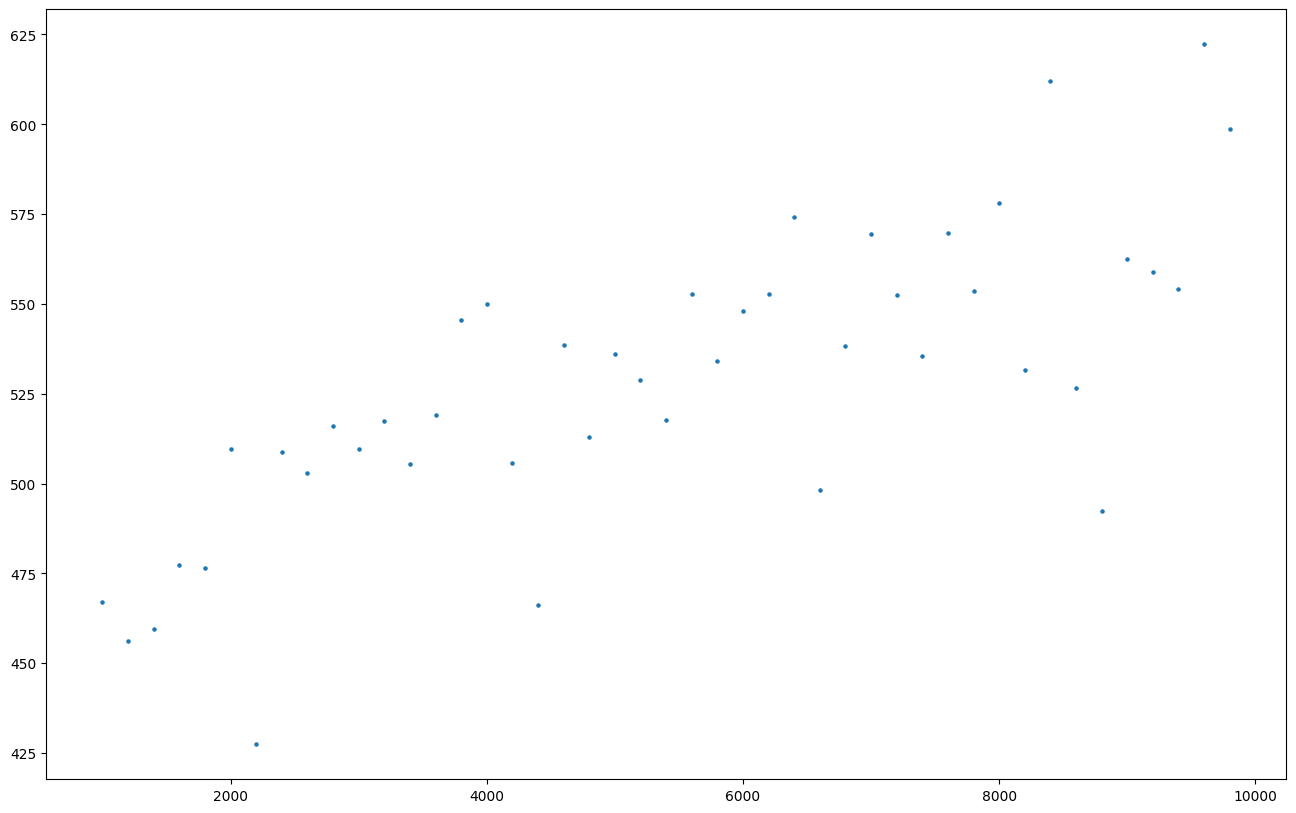

In [243]:
plt.figure(figsize=(16, 10))
plt.scatter(range(1000, 10000, 200), signatures, s=5)
# plt.ylim(0,0.15)

In [176]:
def theo_signature(tau, mu, kappa, beta):
    lamda = 2*mu/(1-kappa)
    k = 1/(1 + kappa)
    gamma = beta*(kappa + 1)
    return lamda * (k**2 + (1-k**2) * (1-np.exp(-gamma * tau)) / (gamma * tau))

In [177]:
signature_realization = np.array([signature(tau) for tau in range(1, T)])

In [178]:
loss_fn = lambda params: np.sqrt(np.mean((signature_realization/signature_realization[10] - theo_signature(np.arange(1, T), params[0], params[1], params[2]))**2))

In [179]:
res = minimize(loss_fn, np.random.uniform(0, 1, 3), method= 'Nelder-Mead', bounds=[(1e-15, 10000), (1e-15, 1-1e-15), (1e-15, 1000)])
loss_fn(res.x), res.x

(1.0745088324686365, array([1.84840049e+00, 1.00000000e-15, 2.03950052e-01]))

In [180]:
mu = res.x[0]
kappa = res.x[1]
beta = res.x[2]
alpha = kappa * beta
print('mu =', mu)
print('alpha =', alpha)
print('beta =', beta)

mu = 1.8484004875425768
alpha = 2.0395005175161935e-16
beta = 0.20395005175161934


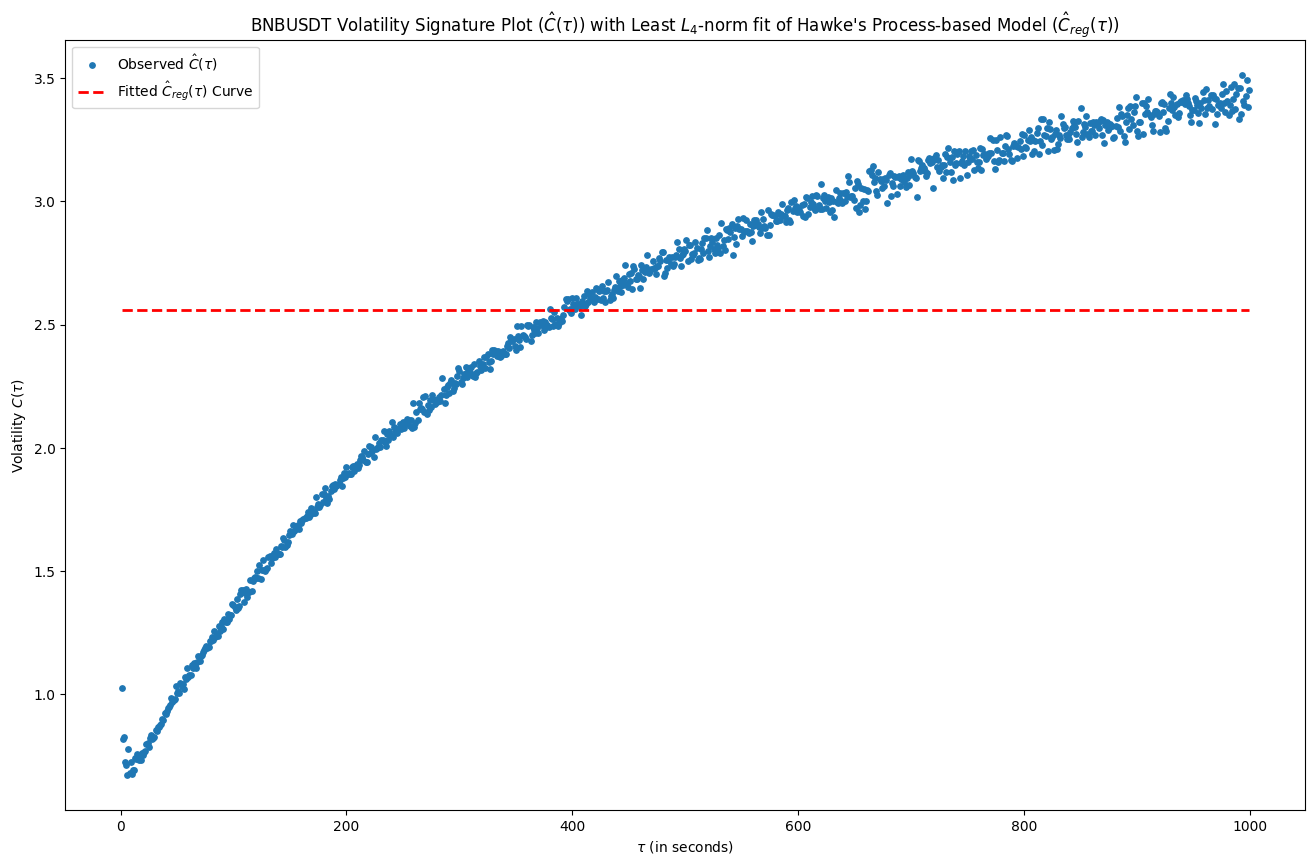

In [181]:
plt.figure(figsize=(16, 10))
plt.scatter(range(1, T), signature_realization, label=r'Observed $\hat{C}(\tau)$', s = 15)
plt.plot(range(1, T), signature_realization[10] * theo_signature(np.arange(1, T), res.x[0], res.x[1], res.x[2]), '--', 
         label=r'Fitted $\hat{C}_{reg}(\tau)$ Curve', color = 'red', linewidth=2)
plt.legend()
plt.title(r"BNBUSDT Volatility Signature Plot ($\hat{C}(\tau)$) with Least $L_4$-norm fit of Hawke's Process-based Model ($\hat{C}_{reg}(\tau)$)")
plt.xlabel(r'$\tau$ (in seconds)')
plt.ylabel(r'Volatility $C(\tau)$')
plt.show()

In [182]:
phi = lambda t: alpha * np.exp(-beta * t) * (t >= 0)

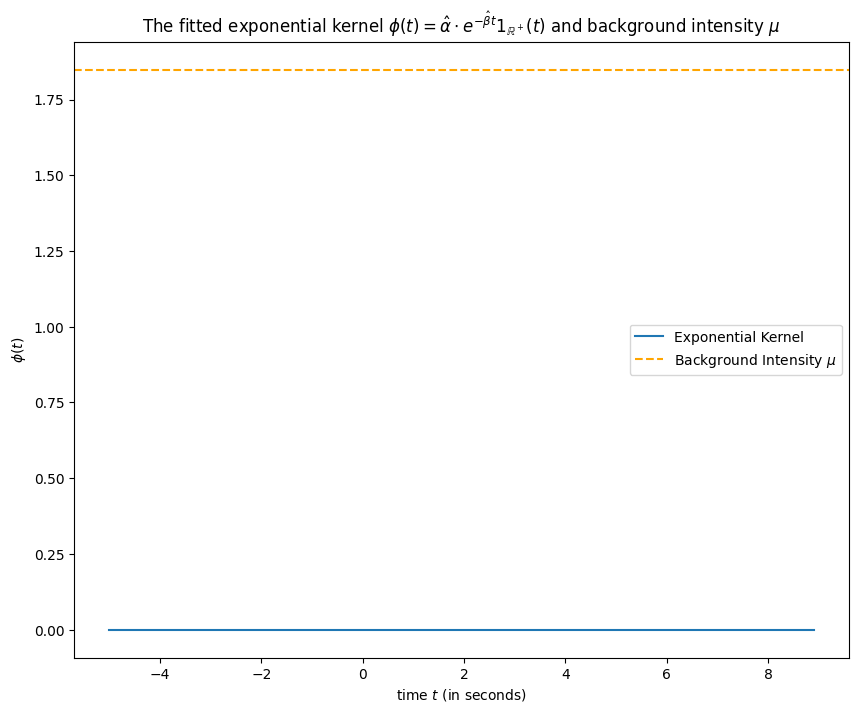

In [183]:
plt.figure(figsize=(10, 8))
plt.plot(list(range(-5, 1)) + list(np.arange(0, 9, 0.1)), [0] * 6 + list(phi(np.arange(0, 9, 0.1))), label='Exponential Kernel')
plt.axhline(mu, color='orange', linestyle='dashed', label='Background Intensity $\mu$')
plt.legend()
plt.title(r'The fitted exponential kernel $\phi(t) = \hat{\alpha}\cdot e^{-\hat{\beta} t}1_{\mathbb{R}^+}(t)$ and background intensity $\mu$')
plt.xlabel('time $t$ (in seconds)')
plt.ylabel('$\phi(t)$')
plt.show()

In [770]:
(data.close.diff().to_numpy()[1:]*10).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [773]:
jumps = np.round(data.close.diff().to_numpy() * 10).astype(int)
jumps[:10]

/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_61568/226064352.py:1: RuntimeWarning: invalid value encountered in cast
  jumps = np.round(data.close.diff().to_numpy() * 10).astype(int)


array([ 0,  0, -1,  0,  1, -1,  0,  0,  0,  1])

In [774]:
np.unique(jumps)

array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6, 13])

In [781]:
(4-1) + np.arange(4-1, 4, 1/(1+1))[1:]

array([6.5])

In [783]:
N1_jump_times_unraveled = list()
N2_jump_times_unraveled = list()

In [784]:
for i, jump in enumerate(jumps):
    if jump > 0:
        N1_jump_times_unraveled.extend(list(np.arange(i-1, i, 1/(jump+1))[1:]))
    elif jump < 0:
        N2_jump_times_unraveled.extend(list(np.arange(i-1, i, 1/(abs(jump)+1))[1:]))

In [787]:
N2_jump_times_unraveled = np.array(N2_jump_times_unraveled)
N1_jump_times_unraveled = np.array(N1_jump_times_unraveled)

Text(0.5, 0.98, 'The BNBUSDT Intensity Function of $N_1$ and $N_2$ for the first $20$ seconds on $30^{th}$ October 2024')

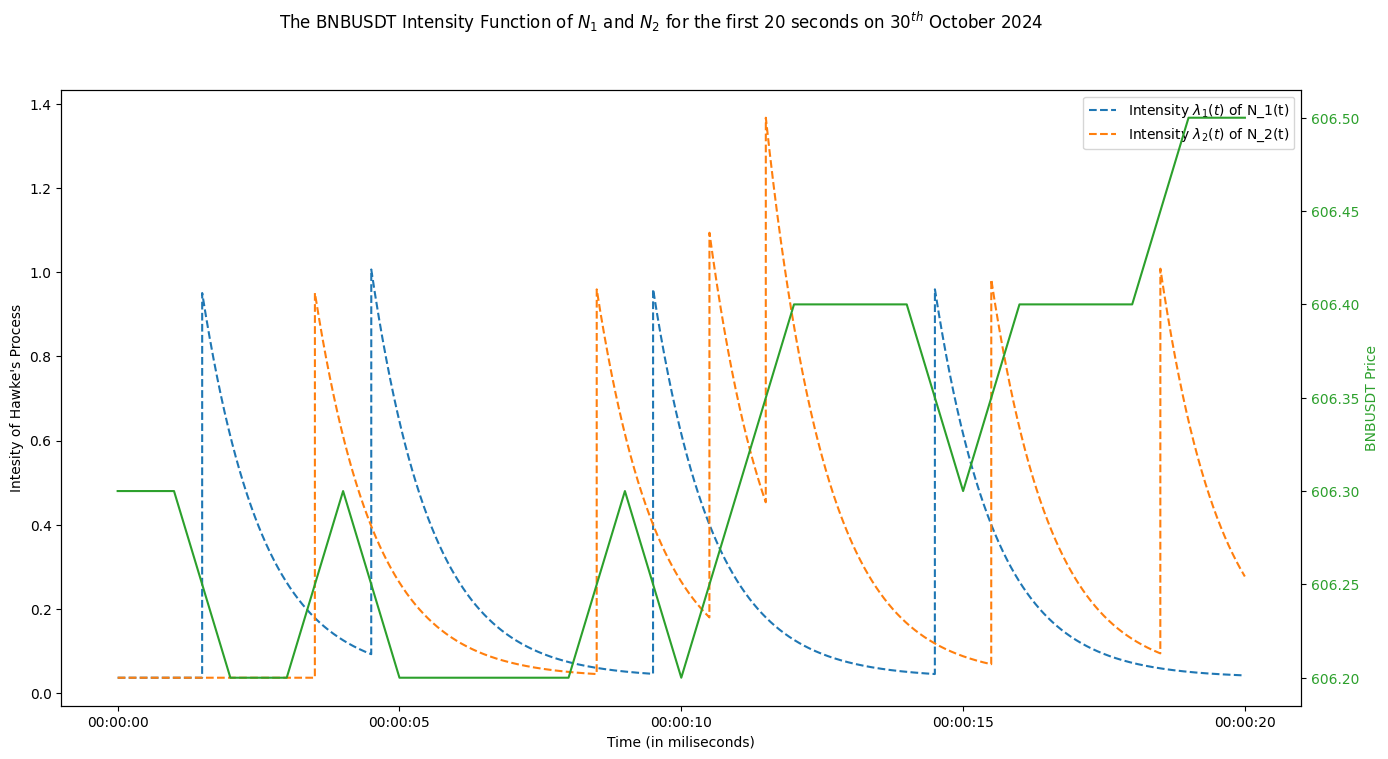

In [969]:
fig, ax1 = plt.subplots(figsize=(16, 8)) 
# plt.plot(data.close[:21])
ax1.plot(
    [data.close.index[0] + pd.Timedelta(t, 's') for t in np.arange(0, 20, 0.001)], 
    [mu + np.sum([phi(t-s) for s in N2_jump_times_unraveled[N2_jump_times_unraveled <= t]]) for t in np.arange(0, 20, 0.001)],
    '--',
    label='Intensity $\lambda_1(t)$ of N_1(t)')
ax1.plot(
    [data.close.index[0] + pd.Timedelta(t, 's') for t in np.arange(0, 20, 0.001)],
    [mu + np.sum([phi(t-s) for s in N1_jump_times_unraveled[N1_jump_times_unraveled <= t]]) for t in np.arange(0, 20, 0.001)],
    '--',
    label='Intensity $\lambda_2(t)$ of N_2(t)')
ax1.legend()
ax1.set_xlabel('Time (in miliseconds)')
ax1.set_ylabel("Intesity of Hawke's Process")

ax2 = ax1.twinx() 
 
color = 'tab:green'
ax2.set_ylabel('BNBUSDT Price', color = color) 
ax2.plot(data.close[:21], color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 

fig.suptitle('The BNBUSDT Intensity Function of $N_1$ and $N_2$ for the first $20$ seconds on $30^{th}$ October 2024')

In [984]:
pred_probs = {
    0: list(),
    1: list(),
    2: list()
}

In [985]:
for t in tqdm(range(data.close.shape[0])):
    jump = jumps[:t]
    l1 = lambda forecast_t: mu + np.sum([phi(forecast_t-s) for s in N2_jump_times_unraveled[np.logical_and(N2_jump_times_unraveled <= t, N2_jump_times_unraveled >= t-5)]])
    l2 = lambda forecast_t: mu + np.sum([phi(forecast_t-s) for s in N1_jump_times_unraveled[np.logical_and(N1_jump_times_unraveled <= t, N1_jump_times_unraveled >= t-5)]])
    l1 = integrate.quad(l1, t, t+1)[0]
    l2 = integrate.quad(l2, t, t+1)[0]
    pred_probs[0].append(np.exp(-(l1+l2)) * np.sum([((l1 * l2)**k)/(np.math.factorial(k)) for k in range(20)]))
    pred_probs[1].append((1-pred_probs[0][-1]) * l1 / (l1 + l2))
    pred_probs[2].append((1-pred_probs[0][-1]) * l2 / (l1 + l2))

100%|██████████| 86400/86400 [01:08<00:00, 1252.23it/s]


In [987]:
pred_proba = pd.DataFrame(pred_probs)
pred_proba.index = data.index

In [988]:
pred_proba

,0,1,2
start_time,,,
2024-10-30 00:00:00,0.929338,0.035331,0.035331
2024-10-30 00:00:01,0.929338,0.035331,0.035331
2024-10-30 00:00:02,0.649015,0.321707,0.029278
2024-10-30 00:00:03,0.806774,0.160667,0.032559
2024-10-30 00:00:04,0.627238,0.070212,0.302549
...,...,...,...
2024-10-30 23:59:55,0.806774,0.032559,0.160667
2024-10-30 23:59:56,0.878977,0.034091,0.086932
2024-10-30 23:59:57,0.909164,0.034795,0.056041


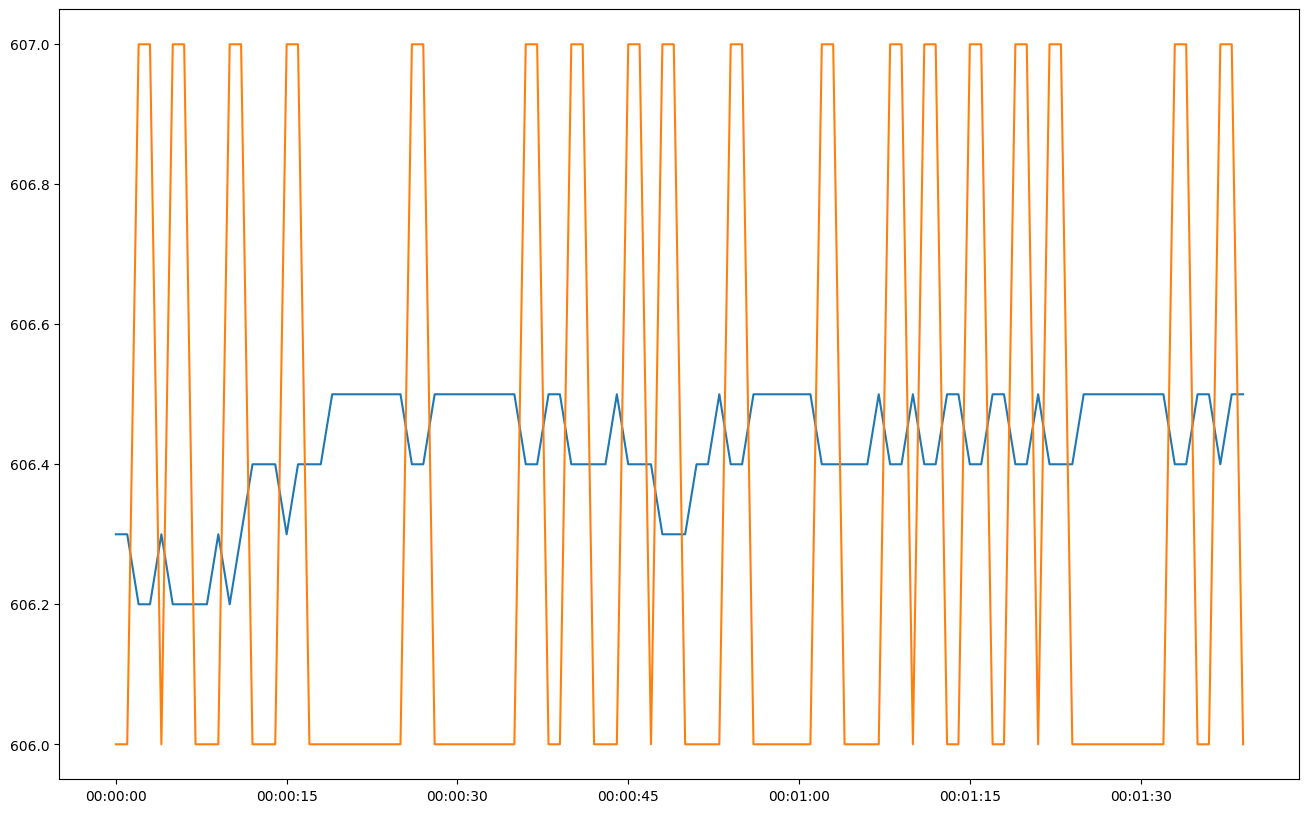

In [989]:
plt.figure(figsize=(16, 10))
plt.plot(data.close[:100])
plt.plot((pred_proba.iloc[:100, 1] >=0.10) + 606)
# plt.plot(pred_proba.iloc[:100, 2] + 606)
plt.show()

In [990]:
pred_proba

,0,1,2
start_time,,,
2024-10-30 00:00:00,0.929338,0.035331,0.035331
2024-10-30 00:00:01,0.929338,0.035331,0.035331
2024-10-30 00:00:02,0.649015,0.321707,0.029278
2024-10-30 00:00:03,0.806774,0.160667,0.032559
2024-10-30 00:00:04,0.627238,0.070212,0.302549
...,...,...,...
2024-10-30 23:59:55,0.806774,0.032559,0.160667
2024-10-30 23:59:56,0.878977,0.034091,0.086932
2024-10-30 23:59:57,0.909164,0.034795,0.056041


In [1008]:
THRESH = 0.8
pred_times = pred_proba[pred_proba.iloc[:, 0] <= THRESH].iloc[:, 1:].index + pd.Timedelta(seconds=1)
pred = np.argmax(pred_proba[pred_proba.iloc[:, 0] <= THRESH].iloc[:, 1:], 1)
actual = data.close.diff()[pred_times].to_numpy()
actual[actual == 0] = -1
actual[actual > 0] = 0
actual[actual < 0] = 1
actual = np.round(actual).astype(int)
np.mean(pred == actual)

0.6414022042225468

In [970]:
data_test = pd.read_csv("../data/BNBUSDT-1s-2024-10-31.csv", names=['start_time', 'open', 'high', 'low', 'close', 'vol', 'stop_time', 'quote_asset_vol', 'num_trades', 'taker_base_vol', 'taker_quote_vol', 'ignore'])
data_test = data_test.loc[:, 'start_time':'vol']
data_test['start_time'] = pd.to_datetime(data_test['start_time'], unit='ms')
data_test.set_index('start_time', inplace=True)
data_test

,open,high,low,close,vol
start_time,,,,,
2024-10-31 00:00:00,595.5,595.5,595.4,595.5,10.783
2024-10-31 00:00:01,595.4,595.5,595.4,595.5,0.188
2024-10-31 00:00:02,595.5,595.5,595.5,595.5,0.017
2024-10-31 00:00:03,595.5,595.5,595.5,595.5,0.033
2024-10-31 00:00:04,595.5,595.5,595.5,595.5,1.611
...,...,...,...,...,...
2024-10-31 23:59:55,576.5,576.5,576.5,576.5,0.537
2024-10-31 23:59:56,576.5,576.5,576.5,576.5,0.000
2024-10-31 23:59:57,576.5,576.5,576.5,576.5,0.152


In [971]:
def signature(tau):
    price = np.log(data_test.close[::tau].to_numpy())
    return np.sum((price[1:] - price[:-1])**2) / data_test.close.shape[0]

In [973]:
T = 200

In [974]:
signature_realization = np.array([signature(tau) for tau in range(1, T)])

In [975]:
loss_fn = lambda params: np.sqrt(np.mean((signature_realization/signature_realization[10] - theo_signature(np.arange(1, T), params[0], params[1], params[2]))**2))

In [977]:
res1 = minimize(loss_fn, np.random.uniform(0, 1, 3), method= 'Nelder-Mead', bounds=[(1e-15, 10000), (1e-15, 1-1e-15), (1e-15, 1000)])
loss_fn(res1.x), res1.x

(0.061191010346835696, array([0.05339182, 0.97334189, 1.74926956]))

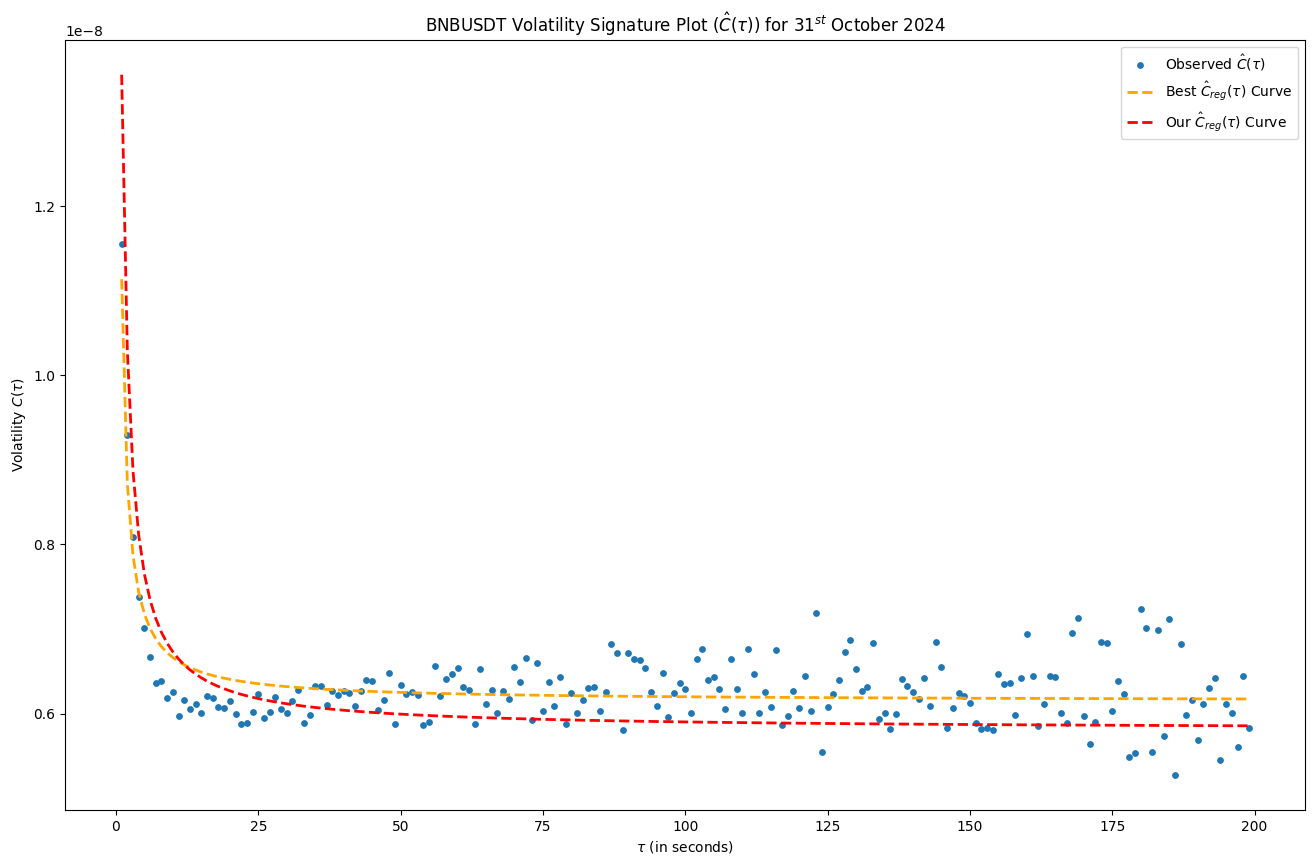

In [982]:
plt.figure(figsize=(16, 10))
plt.scatter(range(1, T), signature_realization, label=r'Observed $\hat{C}(\tau)$', s = 15)
plt.plot(range(1, T), signature_realization[10] * theo_signature(np.arange(1, T), res1.x[0], res1.x[1], res1.x[2]), '--', 
         label=r'Best $\hat{C}_{reg}(\tau)$ Curve', color = 'orange', linewidth=2)
plt.plot(range(1, T), signature_realization[10] * theo_signature(np.arange(1, T), mu, alpha/beta, beta), '--', 
         label=r'Our $\hat{C}_{reg}(\tau)$ Curve', color = 'red', linewidth=2)
plt.legend()
plt.title(r"BNBUSDT Volatility Signature Plot ($\hat{C}(\tau)$) for $31^{st}$ October 2024")
plt.xlabel(r'$\tau$ (in seconds)')
plt.ylabel(r'Volatility $C(\tau)$')
plt.show()

In [976]:
loss_fn([mu, alpha/beta, beta])

0.08578200964249963